# Lab 1 for STAT 415
## Xiaolong Liu
## Apr. 2024

# Import libraries and read the dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
import datetime
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

In [3]:
df = pd.read_csv('Datasets/CreditCardFraud_updated.csv', index_col=0)

In [4]:
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000.0,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,2.0,...,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
1,737265056,737265056,5000.0,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,9.0,...,NaN,0.0,NaN,NaN,NaN,True,NaN,NaN,False,False
2,737265056,737265056,5000.0,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,9.0,...,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
3,737265056,737265056,5000.0,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,9.0,...,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
4,830329091,830329091,5000.0,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,2.0,...,NaN,0.0,NaN,NaN,NaN,True,NaN,NaN,False,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  int64  
 1   customerId                786363 non-null  int64  
 2   creditLimit               786363 non-null  float64
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                781801 non-null  object 
 8   merchantCountryCode       785639 non-null  object 
 9   posEntryMode              782309 non-null  float64
 10  posConditionCode          785954 non-null  float64
 11  merchantCategoryCode      786363 non-null  object 
 12  currentExpDate            786363 non-null  object 
 13  accountOpenDate           786363 non-null  o

# 1. Preliminary Data Quality Checks

In [6]:
columns_with_missing_data = df.columns[df.isnull().all()].tolist()
print("Columns with entirely missing data:", columns_with_missing_data)

Columns with entirely missing data: ['echoBuffer', 'merchantCity', 'merchantState', 'merchantZip', 'posOnPremises', 'recurringAuthInd']


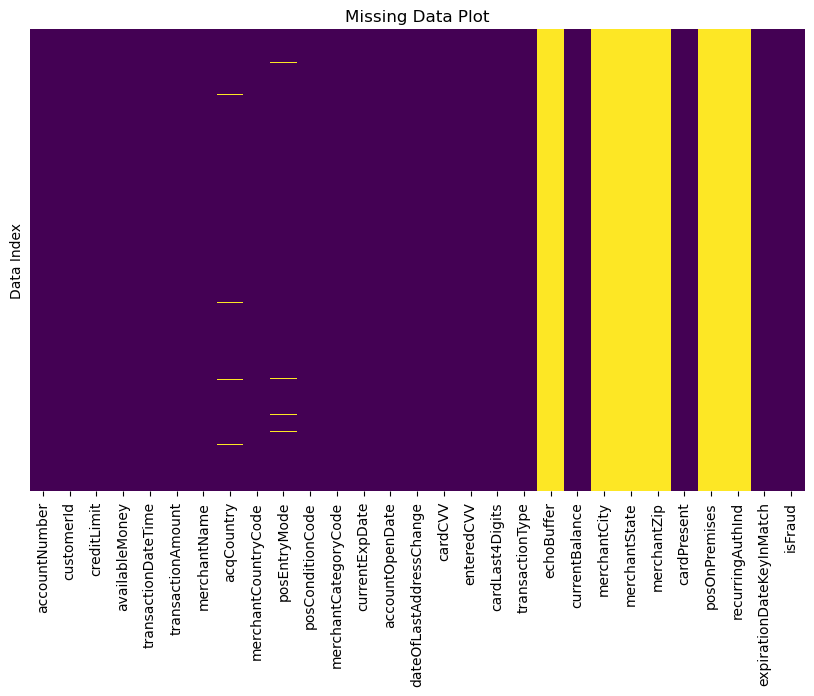

In [7]:
missing_data = df.isnull()

# Draw a heatmap
plt.figure(figsize=(10,6))
sns.heatmap(missing_data, cbar=False, yticklabels=False, cmap='viridis')

# Adding title and labels
plt.title('Missing Data Plot')
plt.ylabel('Data Index')
plt.savefig('Image/missing_plot.jpg', bbox_inches='tight')

plt.show()

In [70]:
missing_values_percentage = (df.isnull().sum() / len(df)) * 100

# Print the percentage of missing values for each column
print(missing_values_percentage)

accountNumber                 0.000000
customerId                    0.000000
creditLimit                   0.000000
availableMoney                0.000000
transactionDateTime           0.000000
transactionAmount             0.000000
merchantName                  0.000000
acqCountry                    0.580139
merchantCountryCode           0.092069
posEntryMode                  0.515538
posConditionCode              0.052012
merchantCategoryCode          0.000000
currentExpDate                0.000000
accountOpenDate               0.000000
dateOfLastAddressChange       0.000000
cardCVV                       0.000000
enteredCVV                    0.000000
cardLast4Digits               0.000000
transactionType               0.088763
echoBuffer                  100.000000
currentBalance                0.000000
merchantCity                100.000000
merchantState               100.000000
merchantZip                 100.000000
cardPresent                   0.000000
posOnPremises            

In [71]:
drop_list = ['echoBuffer', 'merchantCity', 'merchantState', 'merchantZip', 'posOnPremises', 'recurringAuthInd']
df_drop_some = df.drop(drop_list, axis = 1)

In [72]:
df_drop_some[['acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode', 'transactionType']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 786363 entries, 0 to 786362
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   acqCountry           781801 non-null  object 
 1   merchantCountryCode  785639 non-null  object 
 2   posEntryMode         782309 non-null  float64
 3   posConditionCode     785954 non-null  float64
 4   transactionType      785665 non-null  object 
dtypes: float64(2), object(3)
memory usage: 36.0+ MB


In [73]:
df_drop_some[['acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode', 'transactionType']].head()

,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,transactionType
0,US,US,2.0,1.0,PURCHASE
1,US,US,9.0,1.0,PURCHASE
2,US,US,9.0,1.0,PURCHASE
3,US,US,9.0,1.0,PURCHASE
4,US,US,2.0,1.0,PURCHASE


In [74]:
def find_duplicate_columns(df):
    duplicated_columns = []  # List to store groups of duplicated columns
    checked_columns = set()  # Set to keep track of columns that have been checked

    # Iterate over each column
    for col1 in df.columns:
        if col1 not in checked_columns:
            duplicates = [col1]  # Start a new group of duplicates with the current column
            # Compare with every other column
            for col2 in [c for c in df.columns if c not in checked_columns]:
                if col1 != col2 and df[col1].equals(df[col2]):
                    duplicates.append(col2)
                    checked_columns.add(col2)
            # If duplicates are found, add them to the list of duplicated columns
            if len(duplicates) > 1:
                duplicated_columns.append(duplicates)
            checked_columns.add(col1)
    return duplicated_columns

# Find and print duplicate columns
duplicate_groups = find_duplicate_columns(df_drop_some)
for group in duplicate_groups:
    print(f"{group[0]}: {', '.join(group[1:])}")

accountNumber: customerId


In [75]:
df_revised = df_drop_some.drop('customerId', axis = 1)

In [76]:
df_revised.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 786363 entries, 0 to 786362
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  int64  
 1   creditLimit               786363 non-null  float64
 2   availableMoney            786363 non-null  float64
 3   transactionDateTime       786363 non-null  object 
 4   transactionAmount         786363 non-null  float64
 5   merchantName              786363 non-null  object 
 6   acqCountry                781801 non-null  object 
 7   merchantCountryCode       785639 non-null  object 
 8   posEntryMode              782309 non-null  float64
 9   posConditionCode          785954 non-null  float64
 10  merchantCategoryCode      786363 non-null  object 
 11  currentExpDate            786363 non-null  object 
 12  accountOpenDate           786363 non-null  object 
 13  dateOfLastAddressChange   786363 non-null  o

# 2. Outliers in numerical variables

In [77]:
df_revised.head()

,accountNumber,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,737265056,5000.0,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,2.0,1.0,...,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.0,False,False,False
1,737265056,5000.0,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,9.0,1.0,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,True,False,False
2,737265056,5000.0,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,9.0,1.0,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False
3,737265056,5000.0,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,9.0,1.0,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False
4,830329091,5000.0,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,2.0,1.0,...,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.0,True,False,False


In [78]:
df_revised['transactionAmount_origin'] = df_revised['transactionAmount']

In [79]:
standard_scaler = StandardScaler()
df_revised[['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance']] = standard_scaler.fit_transform(df_revised[['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance']])

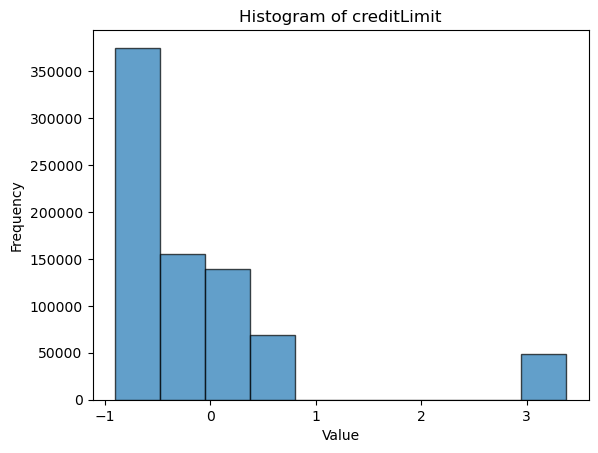

In [80]:
plt.hist(df_revised['creditLimit'], bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of creditLimit')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.savefig('Image/creditLimit.jpg', bbox_inches='tight')

plt.show()

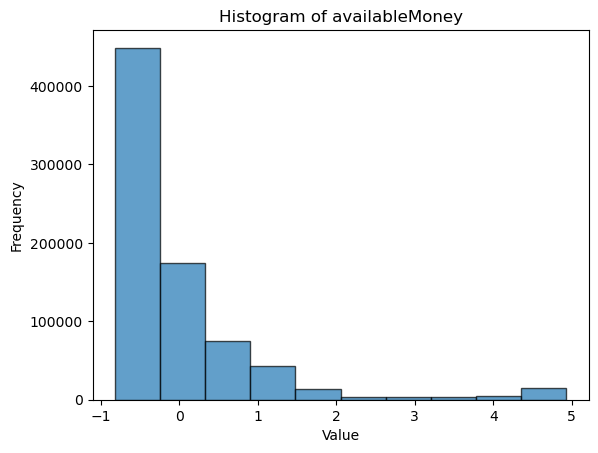

In [81]:
plt.hist(df_revised['availableMoney'], bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of availableMoney')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.savefig('Image/availableMoney.jpg', bbox_inches='tight')

plt.show()

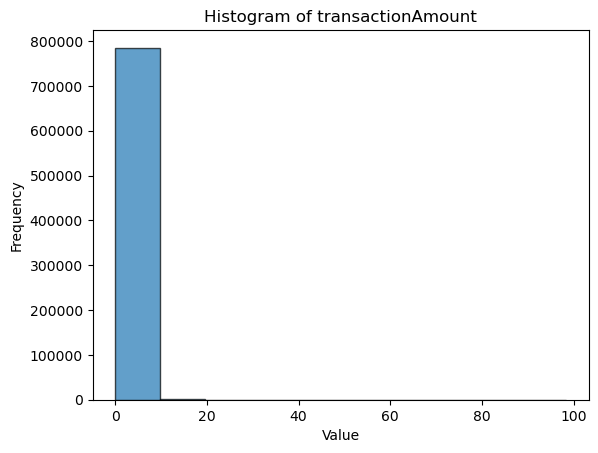

In [82]:
plt.hist(df_revised['transactionAmount'], bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of transactionAmount')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.savefig('Image/transactionAmount.jpg', bbox_inches='tight')

plt.show()

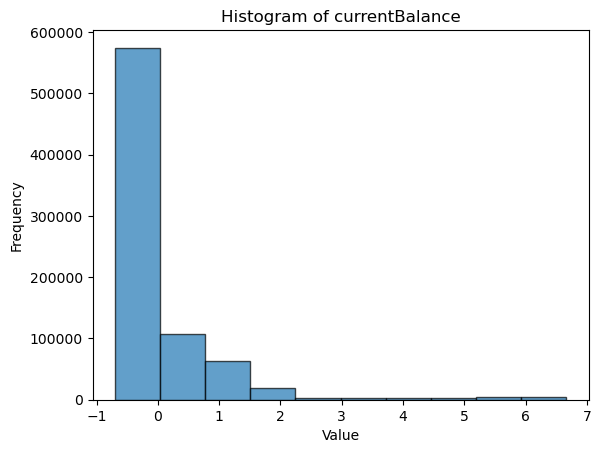

In [83]:
plt.hist(df_revised['currentBalance'], bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of currentBalance')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.savefig('Image/currentBalance.jpg', bbox_inches='tight')

plt.show()

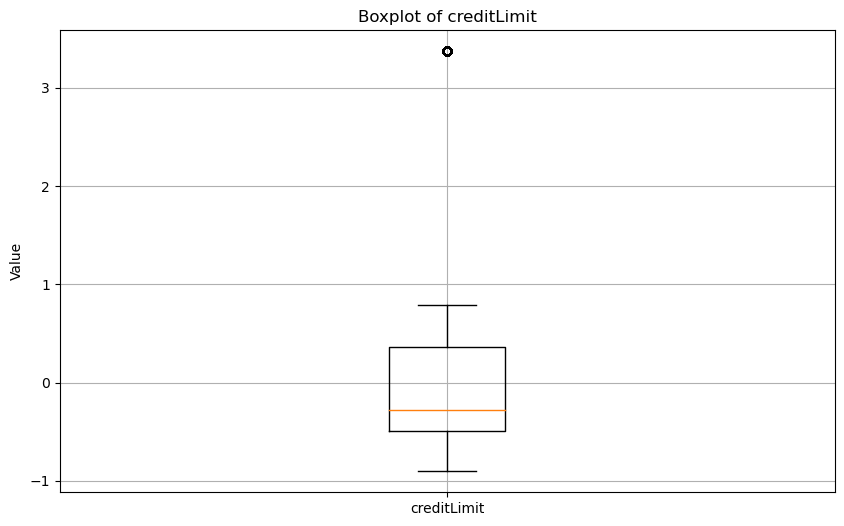

In [84]:
plt.figure(figsize=(10, 6))  # Optional: Adjusts the size of the figure
plt.boxplot(df_revised['creditLimit'].values, labels= ['creditLimit'])
plt.title('Boxplot of creditLimit')
plt.ylabel('Value')
plt.grid(True)  # Optional: Adds a grid for easier analysis
plt.savefig('Image/creditLimit_box.jpg', bbox_inches='tight')
plt.show()

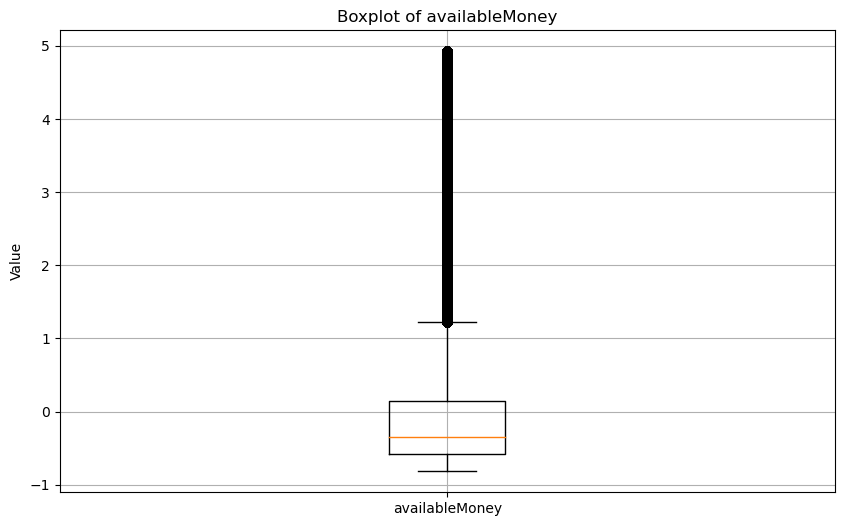

In [85]:
plt.figure(figsize=(10, 6))  # Optional: Adjusts the size of the figure
plt.boxplot(df_revised['availableMoney'].values, labels=['availableMoney'])
plt.title('Boxplot of availableMoney')
plt.ylabel('Value')
plt.grid(True)  # Optional: Adds a grid for easier analysis
plt.savefig('Image/availableMoney_box.jpg', bbox_inches='tight')
plt.show()

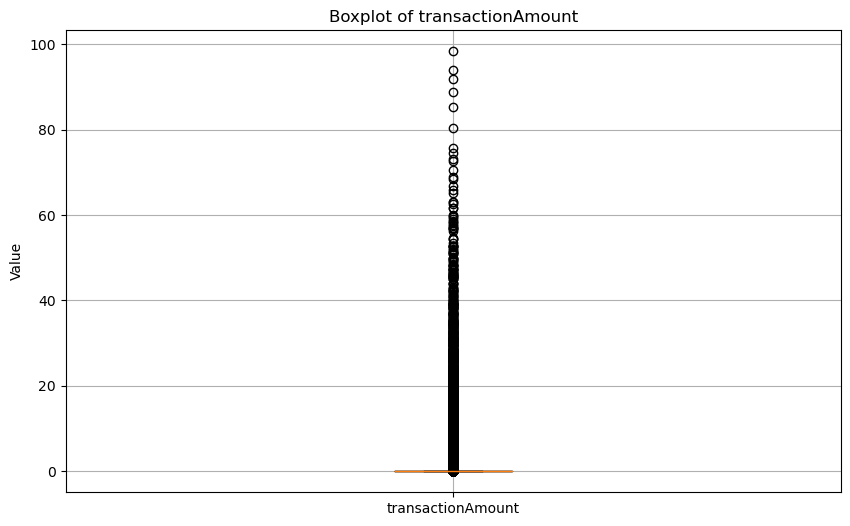

In [86]:
plt.figure(figsize=(10, 6))  # Optional: Adjusts the size of the figure
plt.boxplot(df_revised['transactionAmount'].values, labels=['transactionAmount'])
plt.title('Boxplot of transactionAmount')
plt.ylabel('Value')
plt.grid(True)  # Optional: Adds a grid for easier analysis
plt.savefig('Image/transactionAmount_box.jpg', bbox_inches='tight')
plt.show()

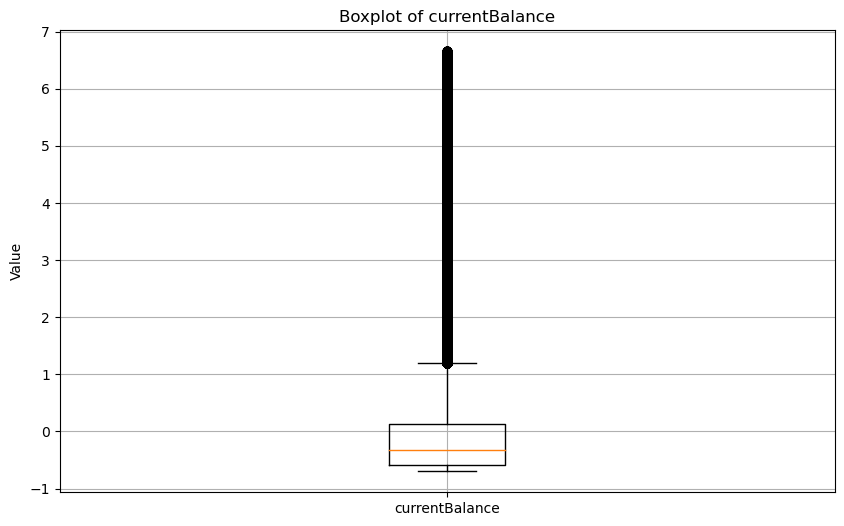

In [87]:
plt.figure(figsize=(10, 6))  # Optional: Adjusts the size of the figure
plt.boxplot(df_revised['currentBalance'].values, labels=['currentBalance'])
plt.title('Boxplot of currentBalance')
plt.ylabel('Value')
plt.grid(True)  # Optional: Adds a grid for easier analysis
plt.savefig('Image/currentBalance_box.jpg', bbox_inches='tight')
plt.show()

In [88]:
data = df_revised['creditLimit']
z_scores = stats.zscore(data)
threshold = 3
# Find outliers
outliers = data[np.abs(z_scores) > threshold]
print("num of outliers:", len(outliers))

num of outliers: 48781


In [89]:
data = df_revised['availableMoney']
z_scores = stats.zscore(data)
threshold = 3
# Find outliers
outliers = data[np.abs(z_scores) > threshold]
print("num of outliers:", len(outliers))

num of outliers: 25524


In [90]:
data = df_revised['transactionAmount']
z_scores = stats.zscore(data)
threshold = 3
# Find outliers
outliers = data[np.abs(z_scores) > threshold]
print("num of outliers:", len(outliers))

num of outliers: 1833


In [91]:
data = df_revised['currentBalance']
z_scores = stats.zscore(data)
threshold = 3
# Find outliers
outliers = data[np.abs(z_scores) > threshold]
print("num of outliers:", len(outliers))

num of outliers: 18183


# 3. Dealing with missing data (exploration part is already done in 1)

In [92]:
df_revised['acqCountry'].fillna('missing', inplace=True)
df_revised['merchantCountryCode'].fillna('missing', inplace=True)
df_revised['posEntryMode'].fillna('missing', inplace=True)
df_revised['posConditionCode'].fillna('missing', inplace=True)
df_revised['transactionType'].fillna('missing', inplace=True)

In [93]:
df_revised.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 786363 entries, 0 to 786362
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  int64  
 1   creditLimit               786363 non-null  float64
 2   availableMoney            786363 non-null  float64
 3   transactionDateTime       786363 non-null  object 
 4   transactionAmount         786363 non-null  float64
 5   merchantName              786363 non-null  object 
 6   acqCountry                786363 non-null  object 
 7   merchantCountryCode       786363 non-null  object 
 8   posEntryMode              786363 non-null  object 
 9   posConditionCode          786363 non-null  object 
 10  merchantCategoryCode      786363 non-null  object 
 11  currentExpDate            786363 non-null  object 
 12  accountOpenDate           786363 non-null  object 
 13  dateOfLastAddressChange   786363 non-null  o

# 4. Time Variables

In [94]:
df_time = df_revised[['transactionDateTime', 'currentExpDate', 'accountOpenDate', 'dateOfLastAddressChange']]
df_time.head()

,transactionDateTime,currentExpDate,accountOpenDate,dateOfLastAddressChange
0,2016-08-13T14:27:32,06/2023,2015-03-14,2015-03-14
1,2016-10-11T05:05:54,02/2024,2015-03-14,2015-03-14
2,2016-11-08T09:18:39,08/2025,2015-03-14,2015-03-14
3,2016-12-10T02:14:50,08/2025,2015-03-14,2015-03-14
4,2016-03-24T21:04:46,10/2029,2015-08-06,2015-08-06


In [95]:
df_revised['transactionDateTime'] = pd.to_datetime(df_time['transactionDateTime'], format='%Y-%m-%dT%H:%M:%S')
df_revised['transactionDateTime']

0        2016-08-13 14:27:32
1        2016-10-11 05:05:54
2        2016-11-08 09:18:39
3        2016-12-10 02:14:50
4        2016-03-24 21:04:46
                 ...        
786358   2016-12-22 18:44:12
786359   2016-12-25 16:20:34
786360   2016-12-27 15:46:24
786361   2016-12-29 00:30:55
786362   2016-12-30 20:10:29
Name: transactionDateTime, Length: 786363, dtype: datetime64[ns]

In [96]:
df_revised['currentExpDate'] = pd.to_datetime(df_time['currentExpDate'], format='%m/%Y')
df_revised['currentExpDate']

0        2023-06-01
1        2024-02-01
2        2025-08-01
3        2025-08-01
4        2029-10-01
            ...    
786358   2022-12-01
786359   2023-08-01
786360   2025-08-01
786361   2022-07-01
786362   2024-05-01
Name: currentExpDate, Length: 786363, dtype: datetime64[ns]

In [97]:
df_revised['accountOpenDate'] = pd.to_datetime(df_time['accountOpenDate'], format='%Y-%m-%d')
df_revised['accountOpenDate']

0        2015-03-14
1        2015-03-14
2        2015-03-14
3        2015-03-14
4        2015-08-06
            ...    
786358   2012-08-23
786359   2012-08-23
786360   2012-08-23
786361   2012-08-23
786362   2012-08-23
Name: accountOpenDate, Length: 786363, dtype: datetime64[ns]

In [98]:
df_revised['dateOfLastAddressChange'] = pd.to_datetime(df_time['dateOfLastAddressChange'], format='%Y-%m-%d')
df_revised['dateOfLastAddressChange']

0        2015-03-14
1        2015-03-14
2        2015-03-14
3        2015-03-14
4        2015-08-06
            ...    
786358   2012-08-23
786359   2012-08-23
786360   2012-08-23
786361   2012-08-23
786362   2012-08-23
Name: dateOfLastAddressChange, Length: 786363, dtype: datetime64[ns]

In [99]:
df_revised['transactionDateTime_origin'] = df_revised['transactionDateTime']

In [100]:
df_revised['transactionDate'] = df_revised['transactionDateTime'].dt.date
df_revised['transactionTime'] = df_revised['transactionDateTime'].dt.time
df_revised = df_revised.drop('transactionDateTime', axis = 1)

In [101]:
df_revised[['transactionDate', 'transactionTime', 'currentExpDate', 'accountOpenDate', 'dateOfLastAddressChange']].head()

,transactionDate,transactionTime,currentExpDate,accountOpenDate,dateOfLastAddressChange
0,2016-08-13,14:27:32,2023-06-01,2015-03-14,2015-03-14
1,2016-10-11,05:05:54,2024-02-01,2015-03-14,2015-03-14
2,2016-11-08,09:18:39,2025-08-01,2015-03-14,2015-03-14
3,2016-12-10,02:14:50,2025-08-01,2015-03-14,2015-03-14
4,2016-03-24,21:04:46,2029-10-01,2015-08-06,2015-08-06


In [102]:
df_revised['transactionDate'] = (df_revised['transactionDate'] - df_revised['transactionDate'].min()).dt.total_seconds() / (24 * 3600)
df_revised['transactionTime'] = (pd.to_datetime(df_revised['transactionTime'].astype(str)) - datetime.combine(
    datetime.today(), df_revised['transactionTime'].min())).dt.total_seconds()/ (60*60)
df_revised['currentExpDate'] = (df_revised['currentExpDate'] - df_revised['currentExpDate'].min()).dt.total_seconds() / (24 * 3600)
df_revised['accountOpenDate'] = (df_revised['accountOpenDate'] - df_revised['accountOpenDate'].min()).dt.total_seconds() / (24 * 3600)
df_revised['dateOfLastAddressChange'] = (df_revised['dateOfLastAddressChange'] - 
                                         df_revised['dateOfLastAddressChange'].min()).dt.total_seconds() / (24 * 3600)

In [103]:
df_revised[['transactionDate', 'transactionTime', 'currentExpDate', 'accountOpenDate', 'dateOfLastAddressChange']] = standard_scaler.fit_transform(df_revised[['transactionDate', 'transactionTime', 'currentExpDate', 'accountOpenDate', 'dateOfLastAddressChange']])

In [104]:
df_revised[['transactionDate', 'transactionTime', 'currentExpDate', 'accountOpenDate', 'dateOfLastAddressChange']].head()

,transactionDate,transactionTime,currentExpDate,accountOpenDate,dateOfLastAddressChange
0,0.365422,0.353285,-0.840845,0.586110,-0.046082
1,0.926615,-0.997933,-0.671011,0.586110,-0.046082
2,1.192945,-0.389849,-0.291832,0.586110,-0.046082
3,1.497321,-1.409498,-0.291832,0.586110,-0.046082
4,-0.985249,1.308978,0.763215,0.796497,0.167519


# 5. Special treatment during data wrangling

In [105]:
df_revised.head()

,accountNumber,creditLimit,availableMoney,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,...,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,transactionAmount_origin,transactionDateTime_origin,transactionDate,transactionTime
0,737265056,-0.494962,-0.140835,-0.041205,Uber,US,US,2.0,1.0,rideshare,...,1803,PURCHASE,-0.698224,False,False,False,98.55,2016-08-13 14:27:32,0.365422,0.353285
1,737265056,-0.494962,-0.140835,-0.043344,AMC #191138,US,US,9.0,1.0,entertainment,...,767,PURCHASE,-0.698224,True,False,False,74.51,2016-10-11 05:05:54,0.926615,-0.997933
2,737265056,-0.494962,-0.140835,-0.049307,Play Store,US,US,9.0,1.0,mobileapps,...,767,PURCHASE,-0.698224,False,False,False,7.47,2016-11-08 09:18:39,1.192945,-0.389849
3,737265056,-0.494962,-0.140835,-0.049307,Play Store,US,US,9.0,1.0,mobileapps,...,767,PURCHASE,-0.698224,False,False,False,7.47,2016-12-10 02:14:50,1.497321,-1.409498
4,830329091,-0.494962,-0.140835,-0.043640,Tim Hortons #947751,US,US,2.0,1.0,fastfood,...,3143,PURCHASE,-0.698224,True,False,False,71.18,2016-03-24 21:04:46,-0.985249,1.308978


In [106]:
df_revised['enter_right'] = df_revised['enteredCVV'] == df_revised['cardCVV']
df_revised = df_revised.drop('enteredCVV', axis = 1)

In [107]:
df_revised.head()

,accountNumber,creditLimit,availableMoney,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,...,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,transactionAmount_origin,transactionDateTime_origin,transactionDate,transactionTime,enter_right
0,737265056,-0.494962,-0.140835,-0.041205,Uber,US,US,2.0,1.0,rideshare,...,PURCHASE,-0.698224,False,False,False,98.55,2016-08-13 14:27:32,0.365422,0.353285,True
1,737265056,-0.494962,-0.140835,-0.043344,AMC #191138,US,US,9.0,1.0,entertainment,...,PURCHASE,-0.698224,True,False,False,74.51,2016-10-11 05:05:54,0.926615,-0.997933,True
2,737265056,-0.494962,-0.140835,-0.049307,Play Store,US,US,9.0,1.0,mobileapps,...,PURCHASE,-0.698224,False,False,False,7.47,2016-11-08 09:18:39,1.192945,-0.389849,True
3,737265056,-0.494962,-0.140835,-0.049307,Play Store,US,US,9.0,1.0,mobileapps,...,PURCHASE,-0.698224,False,False,False,7.47,2016-12-10 02:14:50,1.497321,-1.409498,True
4,830329091,-0.494962,-0.140835,-0.043640,Tim Hortons #947751,US,US,2.0,1.0,fastfood,...,PURCHASE,-0.698224,True,False,False,71.18,2016-03-24 21:04:46,-0.985249,1.308978,True


In [108]:
frequency = df_revised['cardLast4Digits'].value_counts()
df_revised['freq_last_4Digits'] = df_revised['cardLast4Digits'].map(frequency)

In [109]:
df_revised.head()

,accountNumber,creditLimit,availableMoney,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,...,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,transactionAmount_origin,transactionDateTime_origin,transactionDate,transactionTime,enter_right,freq_last_4Digits
0,737265056,-0.494962,-0.140835,-0.041205,Uber,US,US,2.0,1.0,rideshare,...,-0.698224,False,False,False,98.55,2016-08-13 14:27:32,0.365422,0.353285,True,1
1,737265056,-0.494962,-0.140835,-0.043344,AMC #191138,US,US,9.0,1.0,entertainment,...,-0.698224,True,False,False,74.51,2016-10-11 05:05:54,0.926615,-0.997933,True,14
2,737265056,-0.494962,-0.140835,-0.049307,Play Store,US,US,9.0,1.0,mobileapps,...,-0.698224,False,False,False,7.47,2016-11-08 09:18:39,1.192945,-0.389849,True,14
3,737265056,-0.494962,-0.140835,-0.049307,Play Store,US,US,9.0,1.0,mobileapps,...,-0.698224,False,False,False,7.47,2016-12-10 02:14:50,1.497321,-1.409498,True,14
4,830329091,-0.494962,-0.140835,-0.043640,Tim Hortons #947751,US,US,2.0,1.0,fastfood,...,-0.698224,True,False,False,71.18,2016-03-24 21:04:46,-0.985249,1.308978,True,30


# 6. Relationship between cardCVV, enteredCVV, cardLast4Digits and the target variable

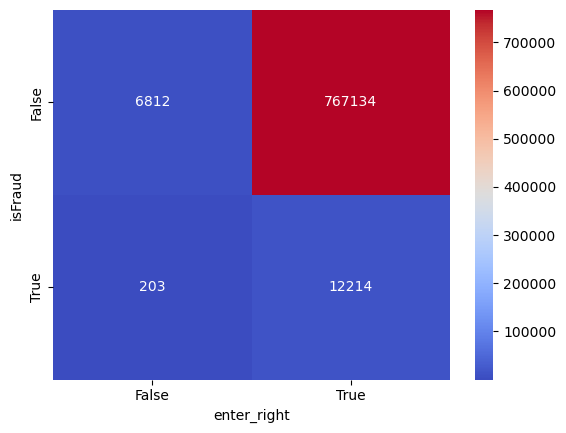

In [110]:
contingency_table = pd.crosstab(df_revised['isFraud'], df_revised['enter_right'])
sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='d')
plt.savefig('Image/contingency_table_enterright.jpg', bbox_inches='tight')

plt.show()

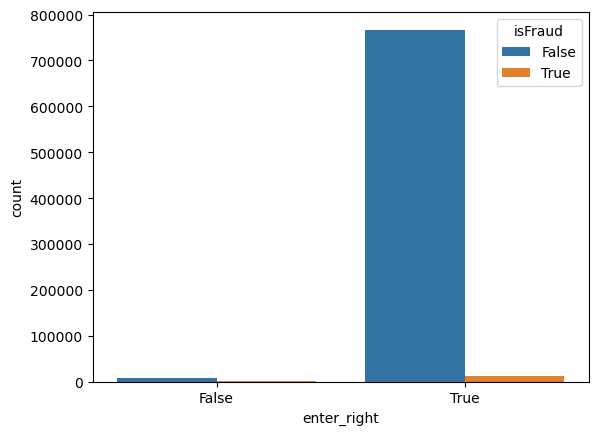

In [111]:
sns.countplot(x='enter_right', hue='isFraud', data=df_revised)
plt.savefig('Image/hist_enterright.jpg', bbox_inches='tight')

plt.show()

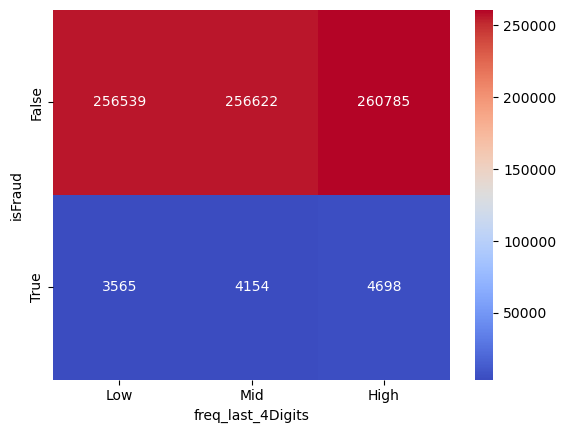

In [112]:
bins = [df_revised['freq_last_4Digits'].min(), df_revised['freq_last_4Digits'].quantile(0.33), 
        df_revised['freq_last_4Digits'].quantile(0.66), df_revised['freq_last_4Digits'].max()]

Frequency_Class = pd.cut(df_revised['freq_last_4Digits'], bins=bins, labels=['Low', 'Mid', 'High'], include_lowest=True)

contingency_table = pd.crosstab(df_revised['isFraud'], Frequency_Class)
sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='d')

plt.savefig('Image/contingency_table_frequency.jpg', bbox_inches='tight')


,isFraud,freq_last_4Digits,enter_right
isFraud,1.000000,0.013833,-0.010006
freq_last_4Digits,0.013833,1.000000,-0.002214
enter_right,-0.010006,-0.002214,1.000000


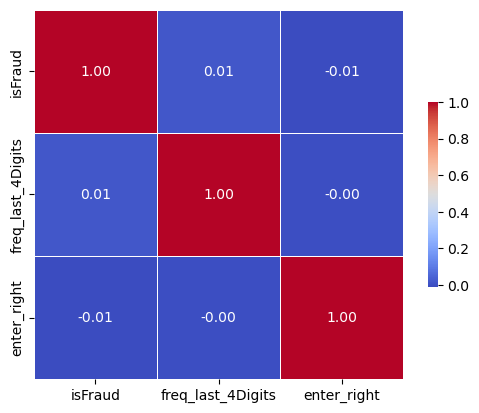

In [113]:
corr = df_revised[['isFraud', 'freq_last_4Digits', 'enter_right']].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})
corr

In [146]:
df_revised['whole_card'] = df_revised['cardCVV'] * 10000 + df_revised['cardLast4Digits']

In [150]:
frequency = df_revised['whole_card'].value_counts()
df_revised['freq_whole_card'] = df_revised['whole_card'].map(frequency)

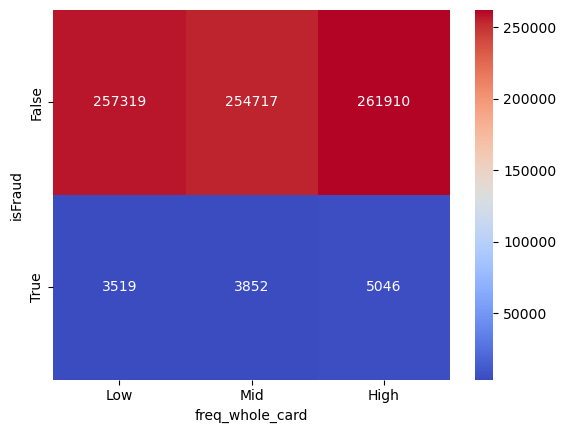

In [152]:
bins = [df_revised['freq_whole_card'].min(), df_revised['freq_whole_card'].quantile(0.33), 
        df_revised['freq_whole_card'].quantile(0.66), df_revised['freq_whole_card'].max()]

Frequency_Class = pd.cut(df_revised['freq_whole_card'], bins=bins, labels=['Low', 'Mid', 'High'], include_lowest=True)

contingency_table = pd.crosstab(df_revised['isFraud'], Frequency_Class)
sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='d')

plt.savefig('Image/contingency_table_frequency_whole.jpg', bbox_inches='tight')


In [182]:
contingency_table / contingency_table.sum()

freq_whole_card,Low,Mid,High
isFraud,,,
False,0.986509,0.985103,0.981098
True,0.013491,0.014897,0.018902


# 7. Analysis of `transactionAmount`

(array([7.85318e+05, 5.36000e+02, 2.61000e+02, 1.30000e+02, 6.00000e+01,
        3.30000e+01, 1.40000e+01, 5.00000e+00, 2.00000e+00, 4.00000e+00]),
 array([-4.99718185e-02,  9.78931801e+00,  1.96286078e+01,  2.94678977e+01,
         3.93071875e+01,  4.91464773e+01,  5.89857672e+01,  6.88250570e+01,
         7.86643468e+01,  8.85036367e+01,  9.83429265e+01]),
 <BarContainer object of 10 artists>)

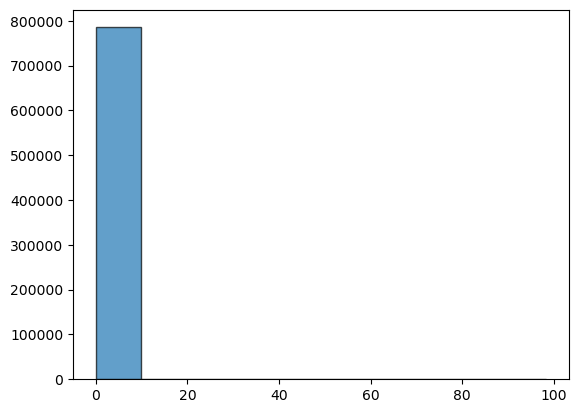

In [114]:
plt.hist(df_revised['transactionAmount'], bins=10, alpha=0.7, edgecolor='black')

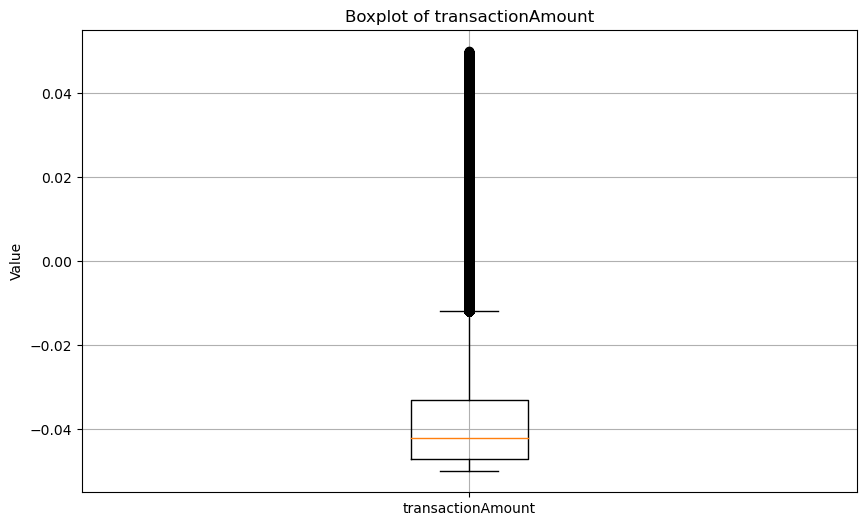

In [115]:
transaction_normal = df_revised[df_revised['transactionAmount'] < 0.05]['transactionAmount']

plt.figure(figsize=(10, 6))  # Optional: Adjusts the size of the figure
plt.boxplot(transaction_normal.values, labels=['transactionAmount'])
plt.title('Boxplot of transactionAmount')
plt.ylabel('Value')
plt.grid(True)  # Optional: Adds a grid for easier analysis
plt.savefig('Image/zoom_in_transactionAmount_box.jpg', bbox_inches='tight')
plt.show()

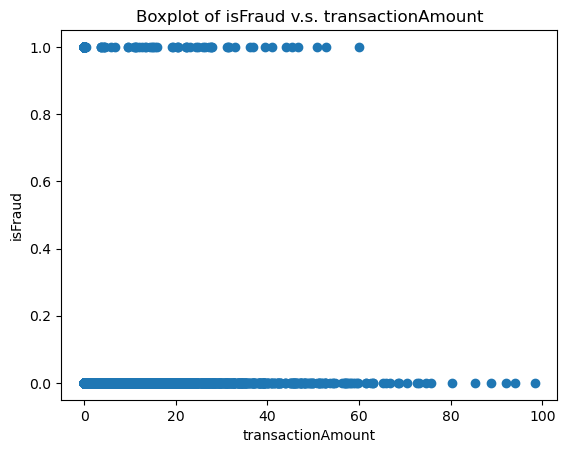

In [116]:
plt.scatter(df_revised['transactionAmount'], df_revised['isFraud'])
plt.title('Boxplot of isFraud v.s. transactionAmount')
plt.ylabel('isFraud')
plt.xlabel('transactionAmount')
plt.savefig('Image/isFraud v.s. transactionAmount.jpg', bbox_inches='tight')
plt.show()

# 8. The relationship between `isFraud` and categorical predictors

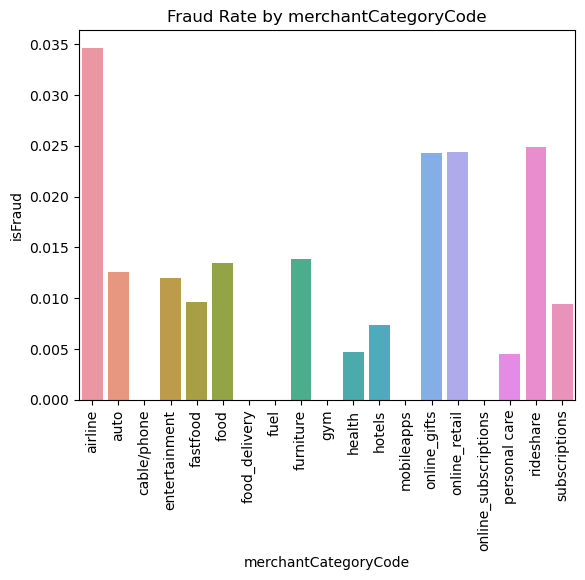

In [117]:
fraud_rate = df_revised.groupby('merchantCategoryCode')['isFraud'].mean().reset_index()
sns.barplot(x='merchantCategoryCode', y='isFraud', data=fraud_rate)
plt.xticks(rotation=90)
plt.title('Fraud Rate by merchantCategoryCode')
plt.savefig('Image/fraud_rate_merchantCategoryCode.jpg', bbox_inches='tight')
plt.show()

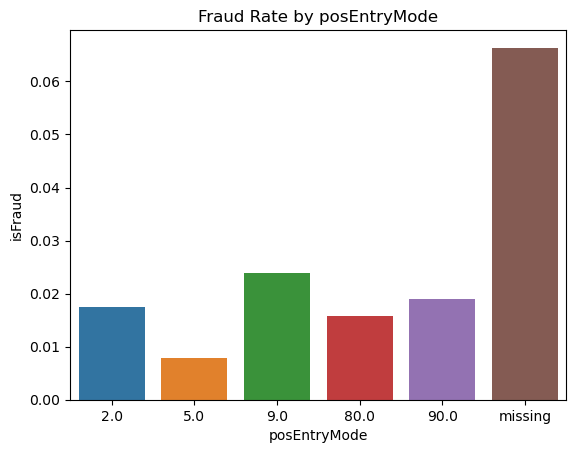

In [118]:
fraud_rate = df_revised.groupby('posEntryMode')['isFraud'].mean().reset_index()
sns.barplot(x='posEntryMode', y='isFraud', data=fraud_rate)
plt.title('Fraud Rate by posEntryMode')
plt.savefig('Image/fraud_rate_posEntryMode.jpg', bbox_inches='tight')
plt.show()

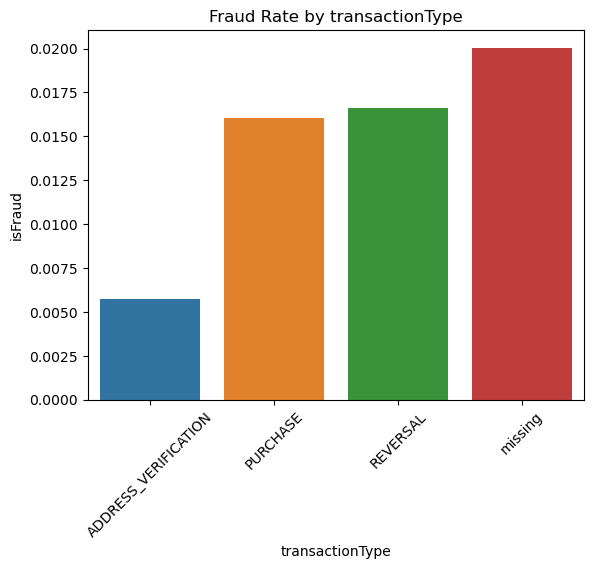

In [119]:
fraud_rate = df_revised.groupby('transactionType')['isFraud'].mean().reset_index()
sns.barplot(x='transactionType', y='isFraud', data=fraud_rate)
plt.xticks(rotation=45)
plt.title('Fraud Rate by transactionType')
plt.savefig('Image/fraud_rate_transactionType.jpg', bbox_inches='tight')
plt.show()

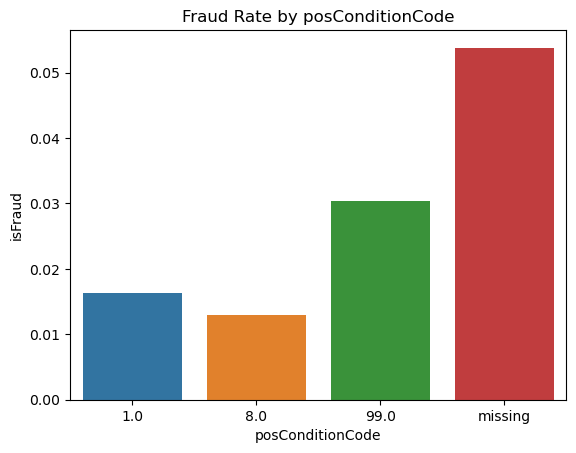

In [120]:
fraud_rate = df_revised.groupby('posConditionCode')['isFraud'].mean().reset_index()
sns.barplot(x='posConditionCode', y='isFraud', data=fraud_rate)
plt.title('Fraud Rate by posConditionCode')
plt.savefig('Image/fraud_rate_posConditionCode.jpg', bbox_inches='tight')
plt.show()

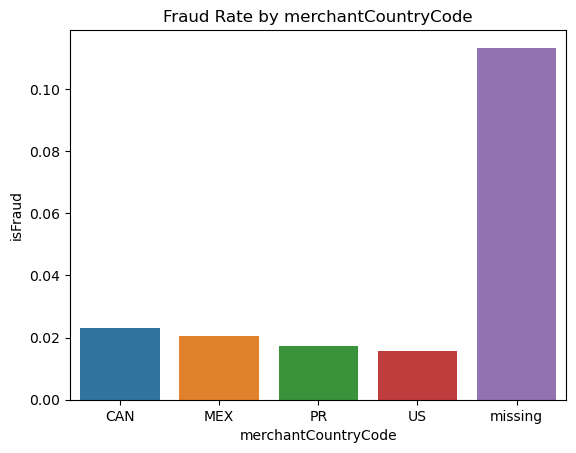

In [121]:
fraud_rate = df_revised.groupby('merchantCountryCode')['isFraud'].mean().reset_index()
sns.barplot(x='merchantCountryCode', y='isFraud', data=fraud_rate)
plt.title('Fraud Rate by merchantCountryCode')
plt.savefig('Image/fraud_rate_merchantCountryCode.jpg', bbox_inches='tight')
plt.show()

# 9. The relationship between `isFraud` and `transactionType` conditioned on `merchantCategoryCode`

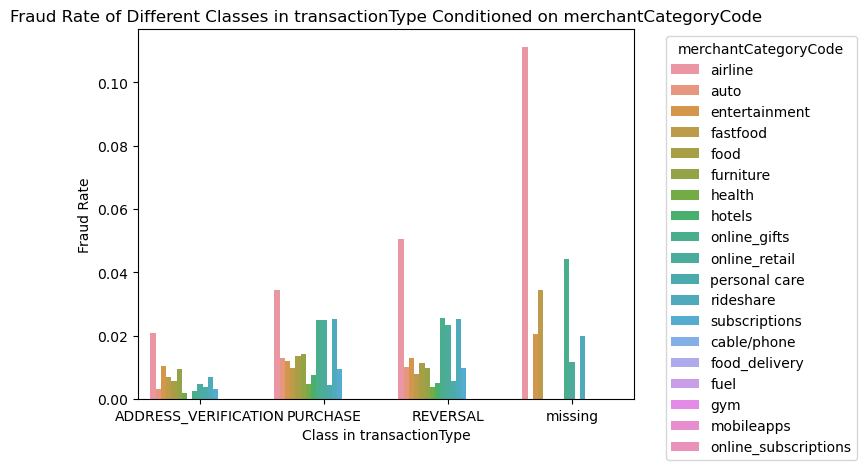

In [122]:
fraud_rate = df_revised.groupby(['transactionType', 'merchantCategoryCode'])['isFraud'].mean().reset_index(name='fraud_rate')

sns.barplot(x='transactionType', y='fraud_rate', hue='merchantCategoryCode', data=fraud_rate)
plt.xlabel('Class in transactionType')
plt.ylabel('Fraud Rate')
plt.title('Fraud Rate of Different Classes in transactionType Conditioned on merchantCategoryCode')
plt.legend(title='merchantCategoryCode', bbox_to_anchor=(1.05, 1), loc='upper left')

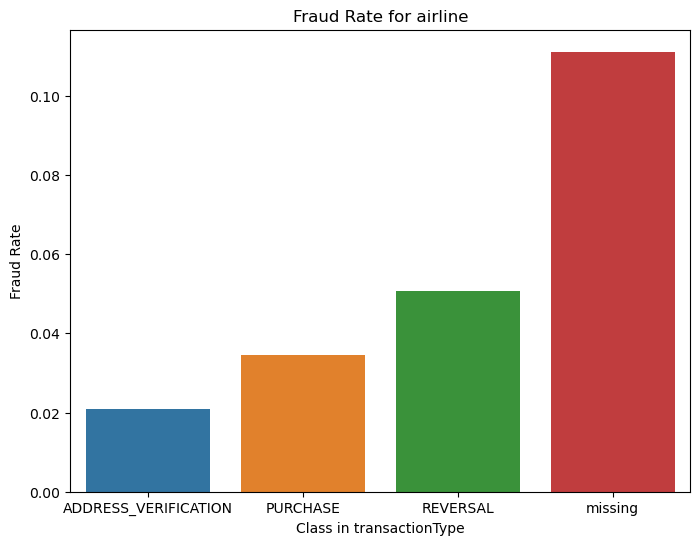

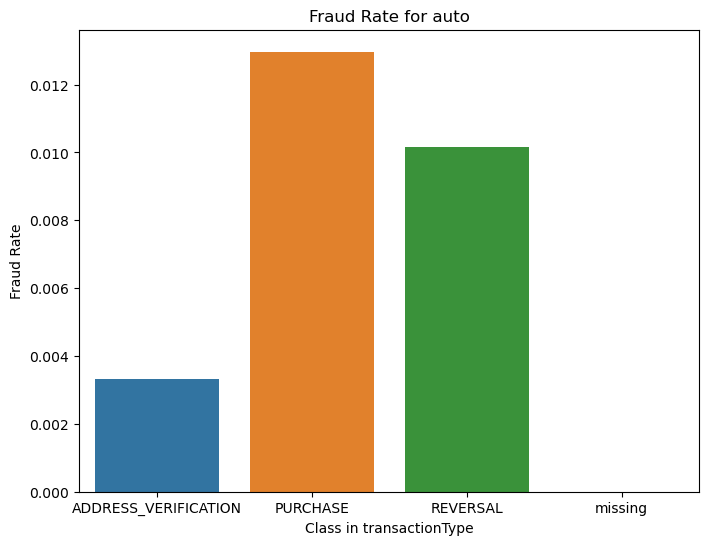

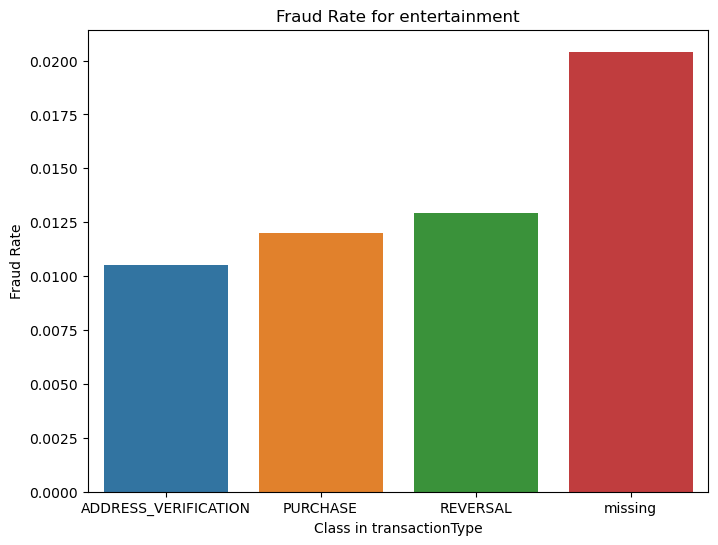

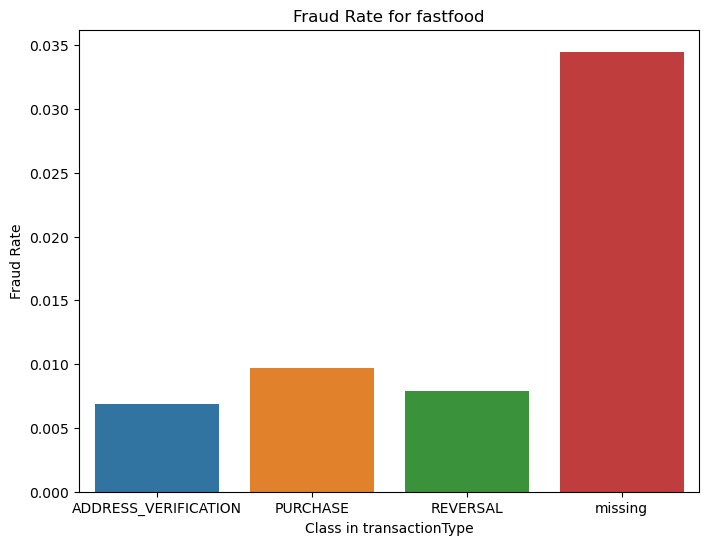

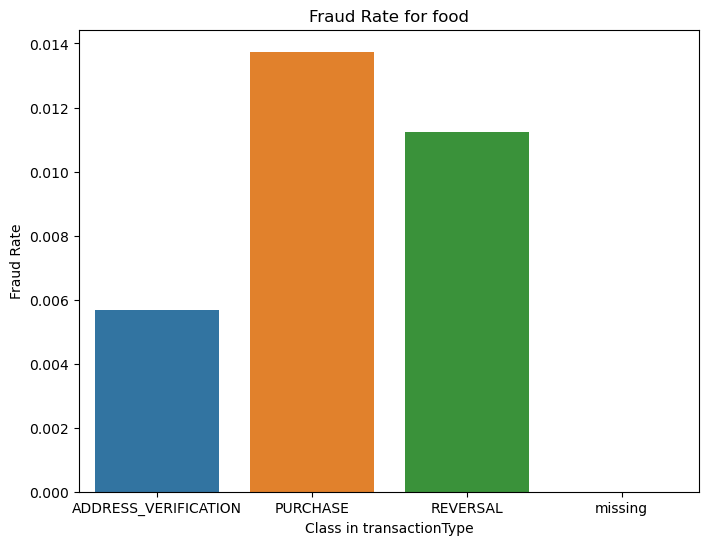

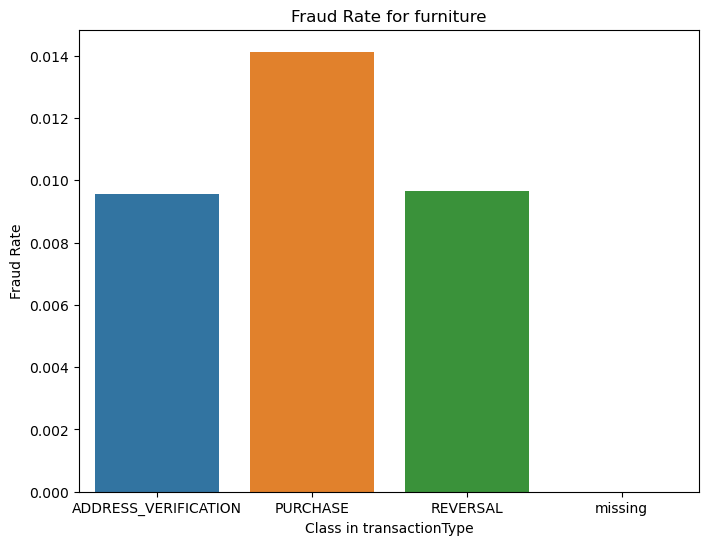

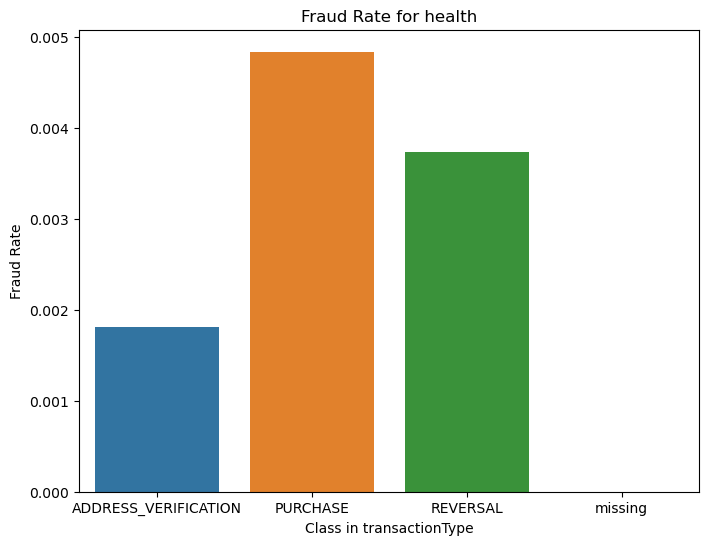

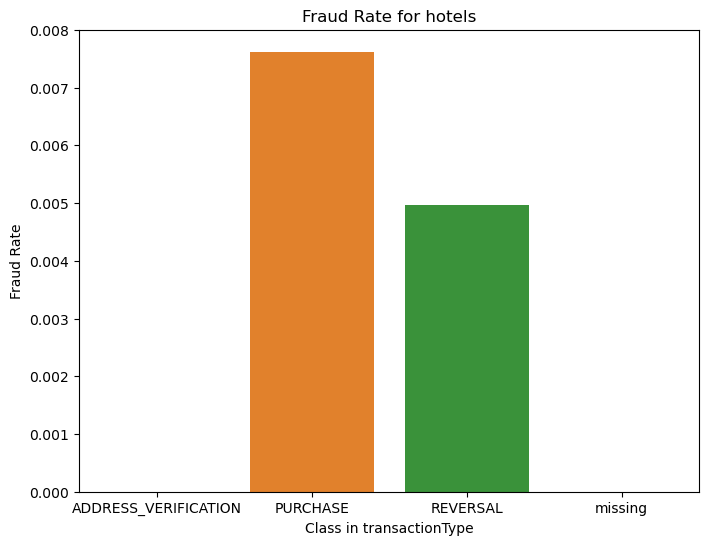

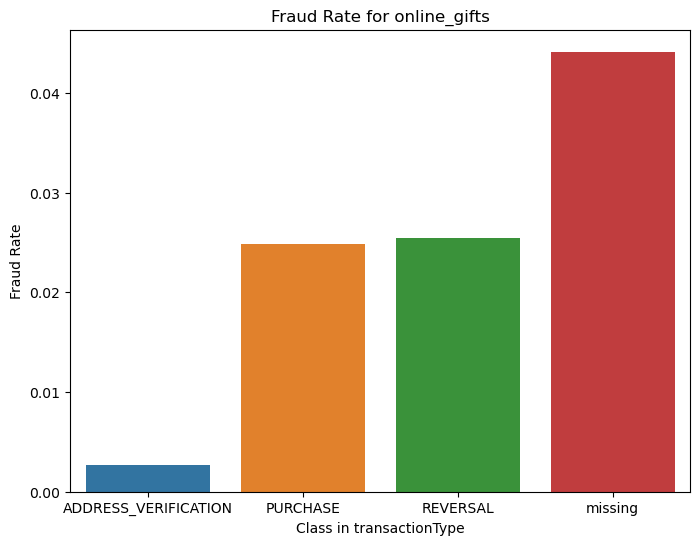

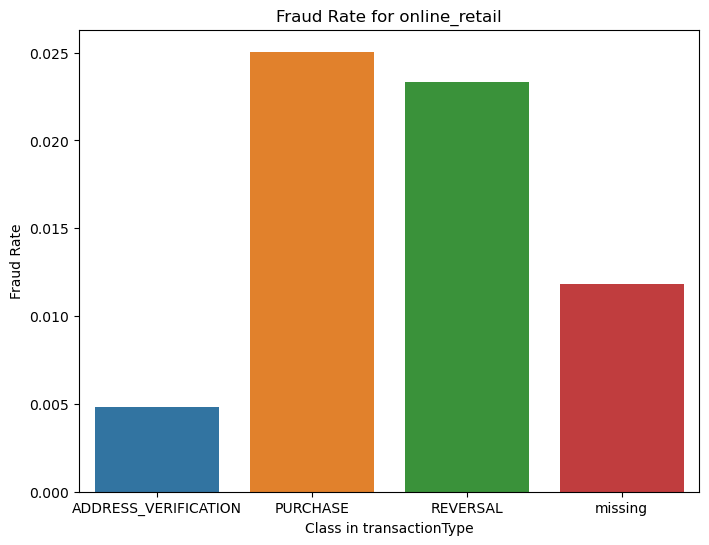

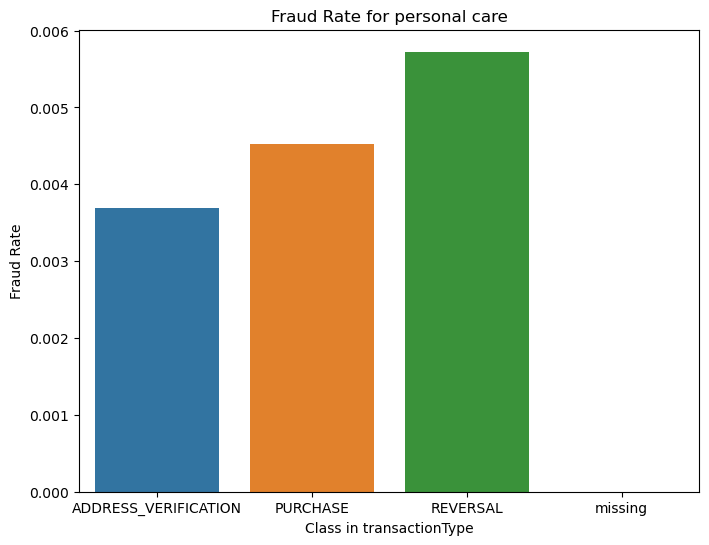

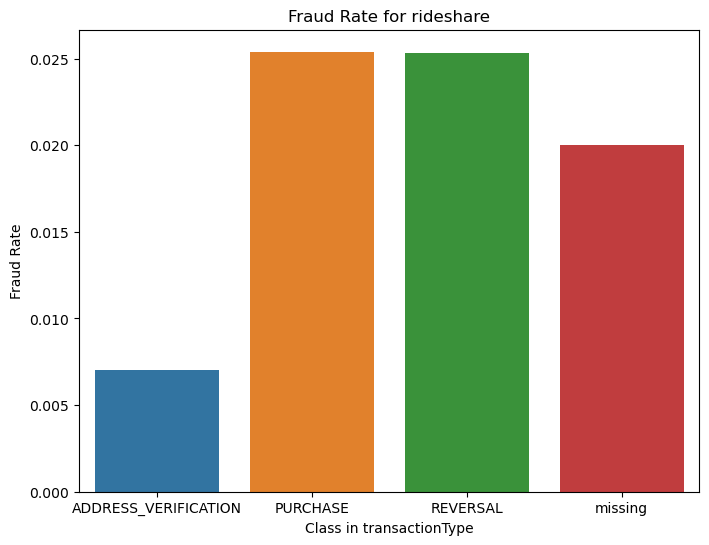

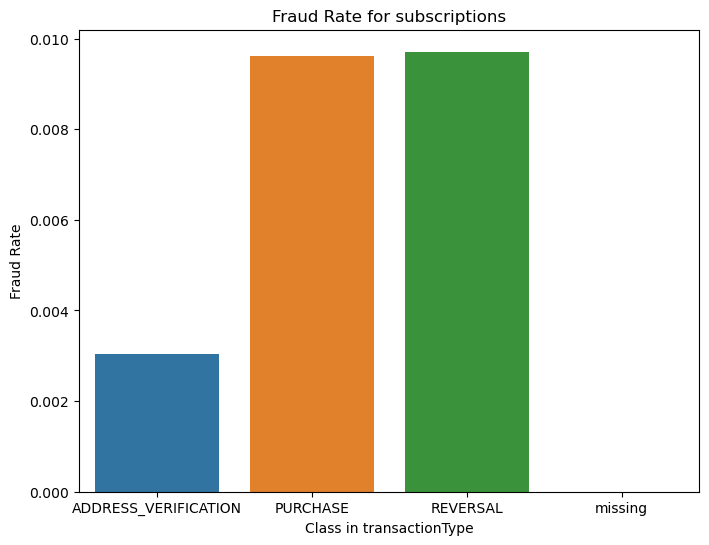

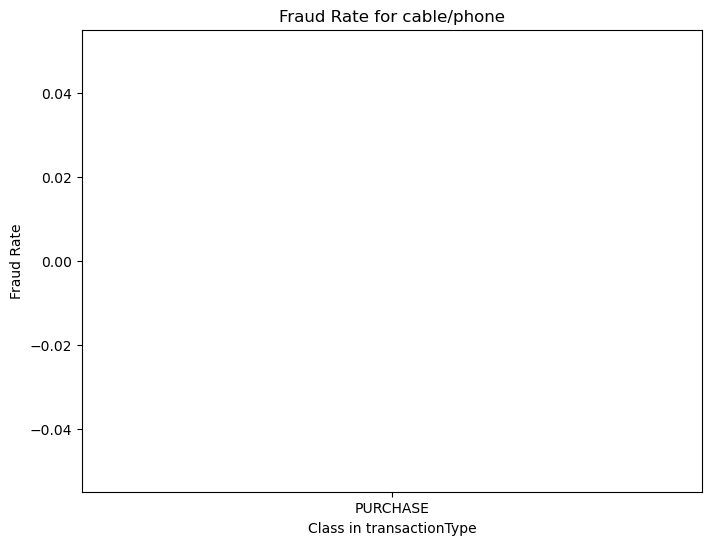

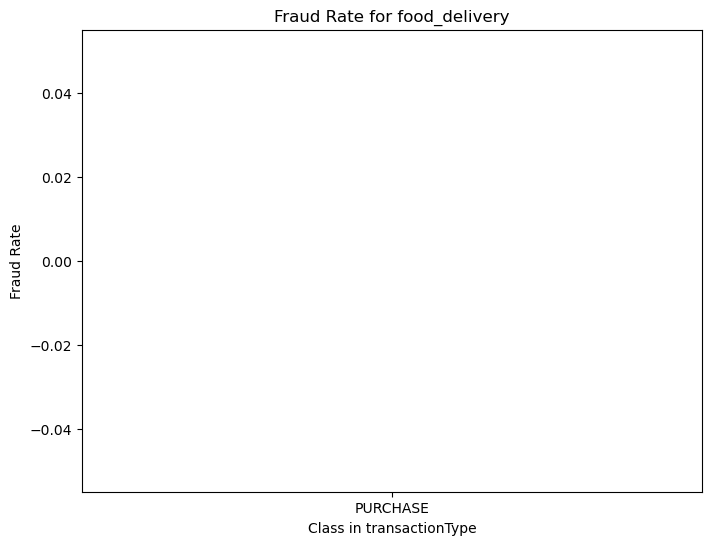

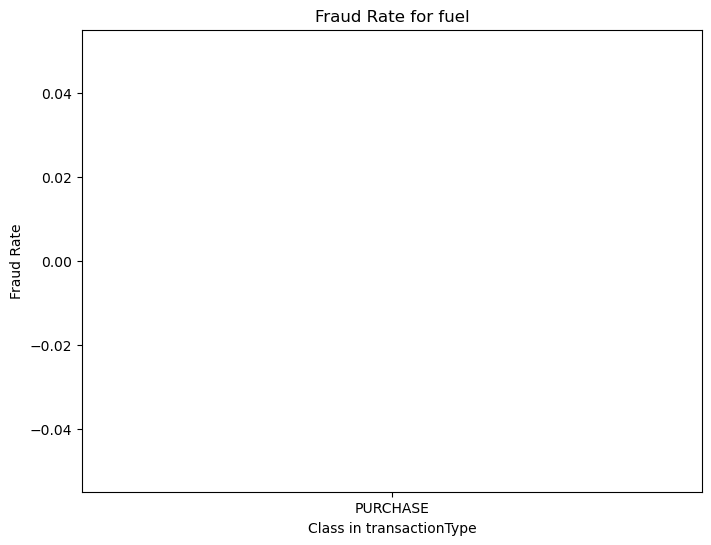

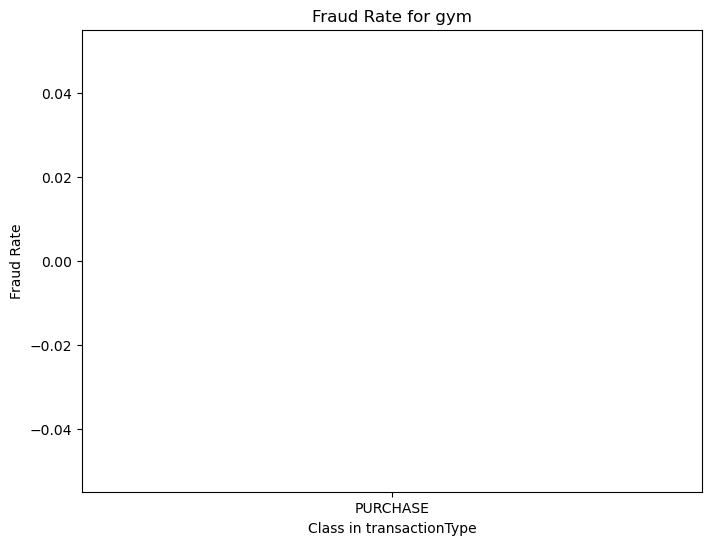

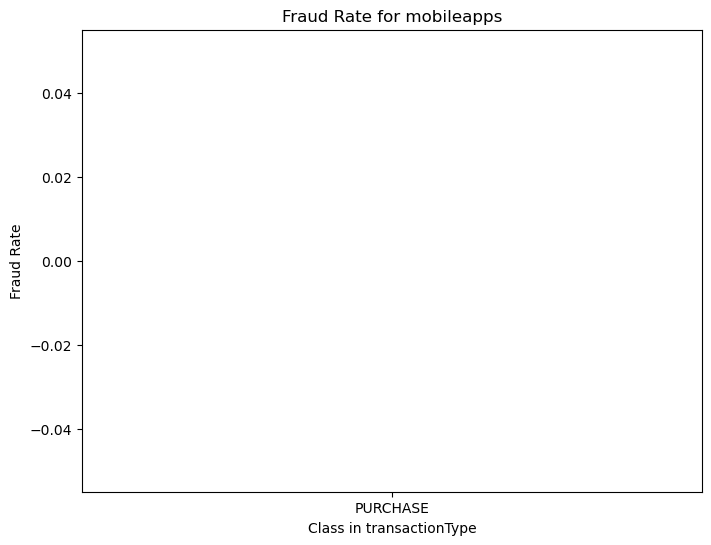

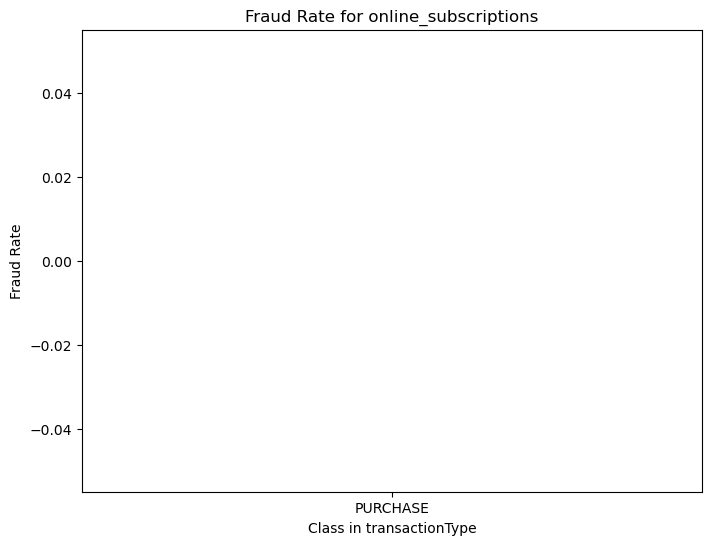

In [123]:
unique_c = fraud_rate['merchantCategoryCode'].unique()
i = 0

for category in unique_c:
    i +=1
    plt.figure(figsize=(8, 6))
    subset = fraud_rate[fraud_rate['merchantCategoryCode'] == category]
    sns.barplot(data=subset, x='transactionType', y='fraud_rate', order=subset['transactionType'].unique())
    
    plt.title(f'Fraud Rate for {category}')
    plt.xlabel('Class in transactionType')
    plt.ylabel('Fraud Rate')
    
    # Save each plot
    plt.savefig(f'Q9 fraud_rate_{i}.jpg')
    plt.show()

/Users/always/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


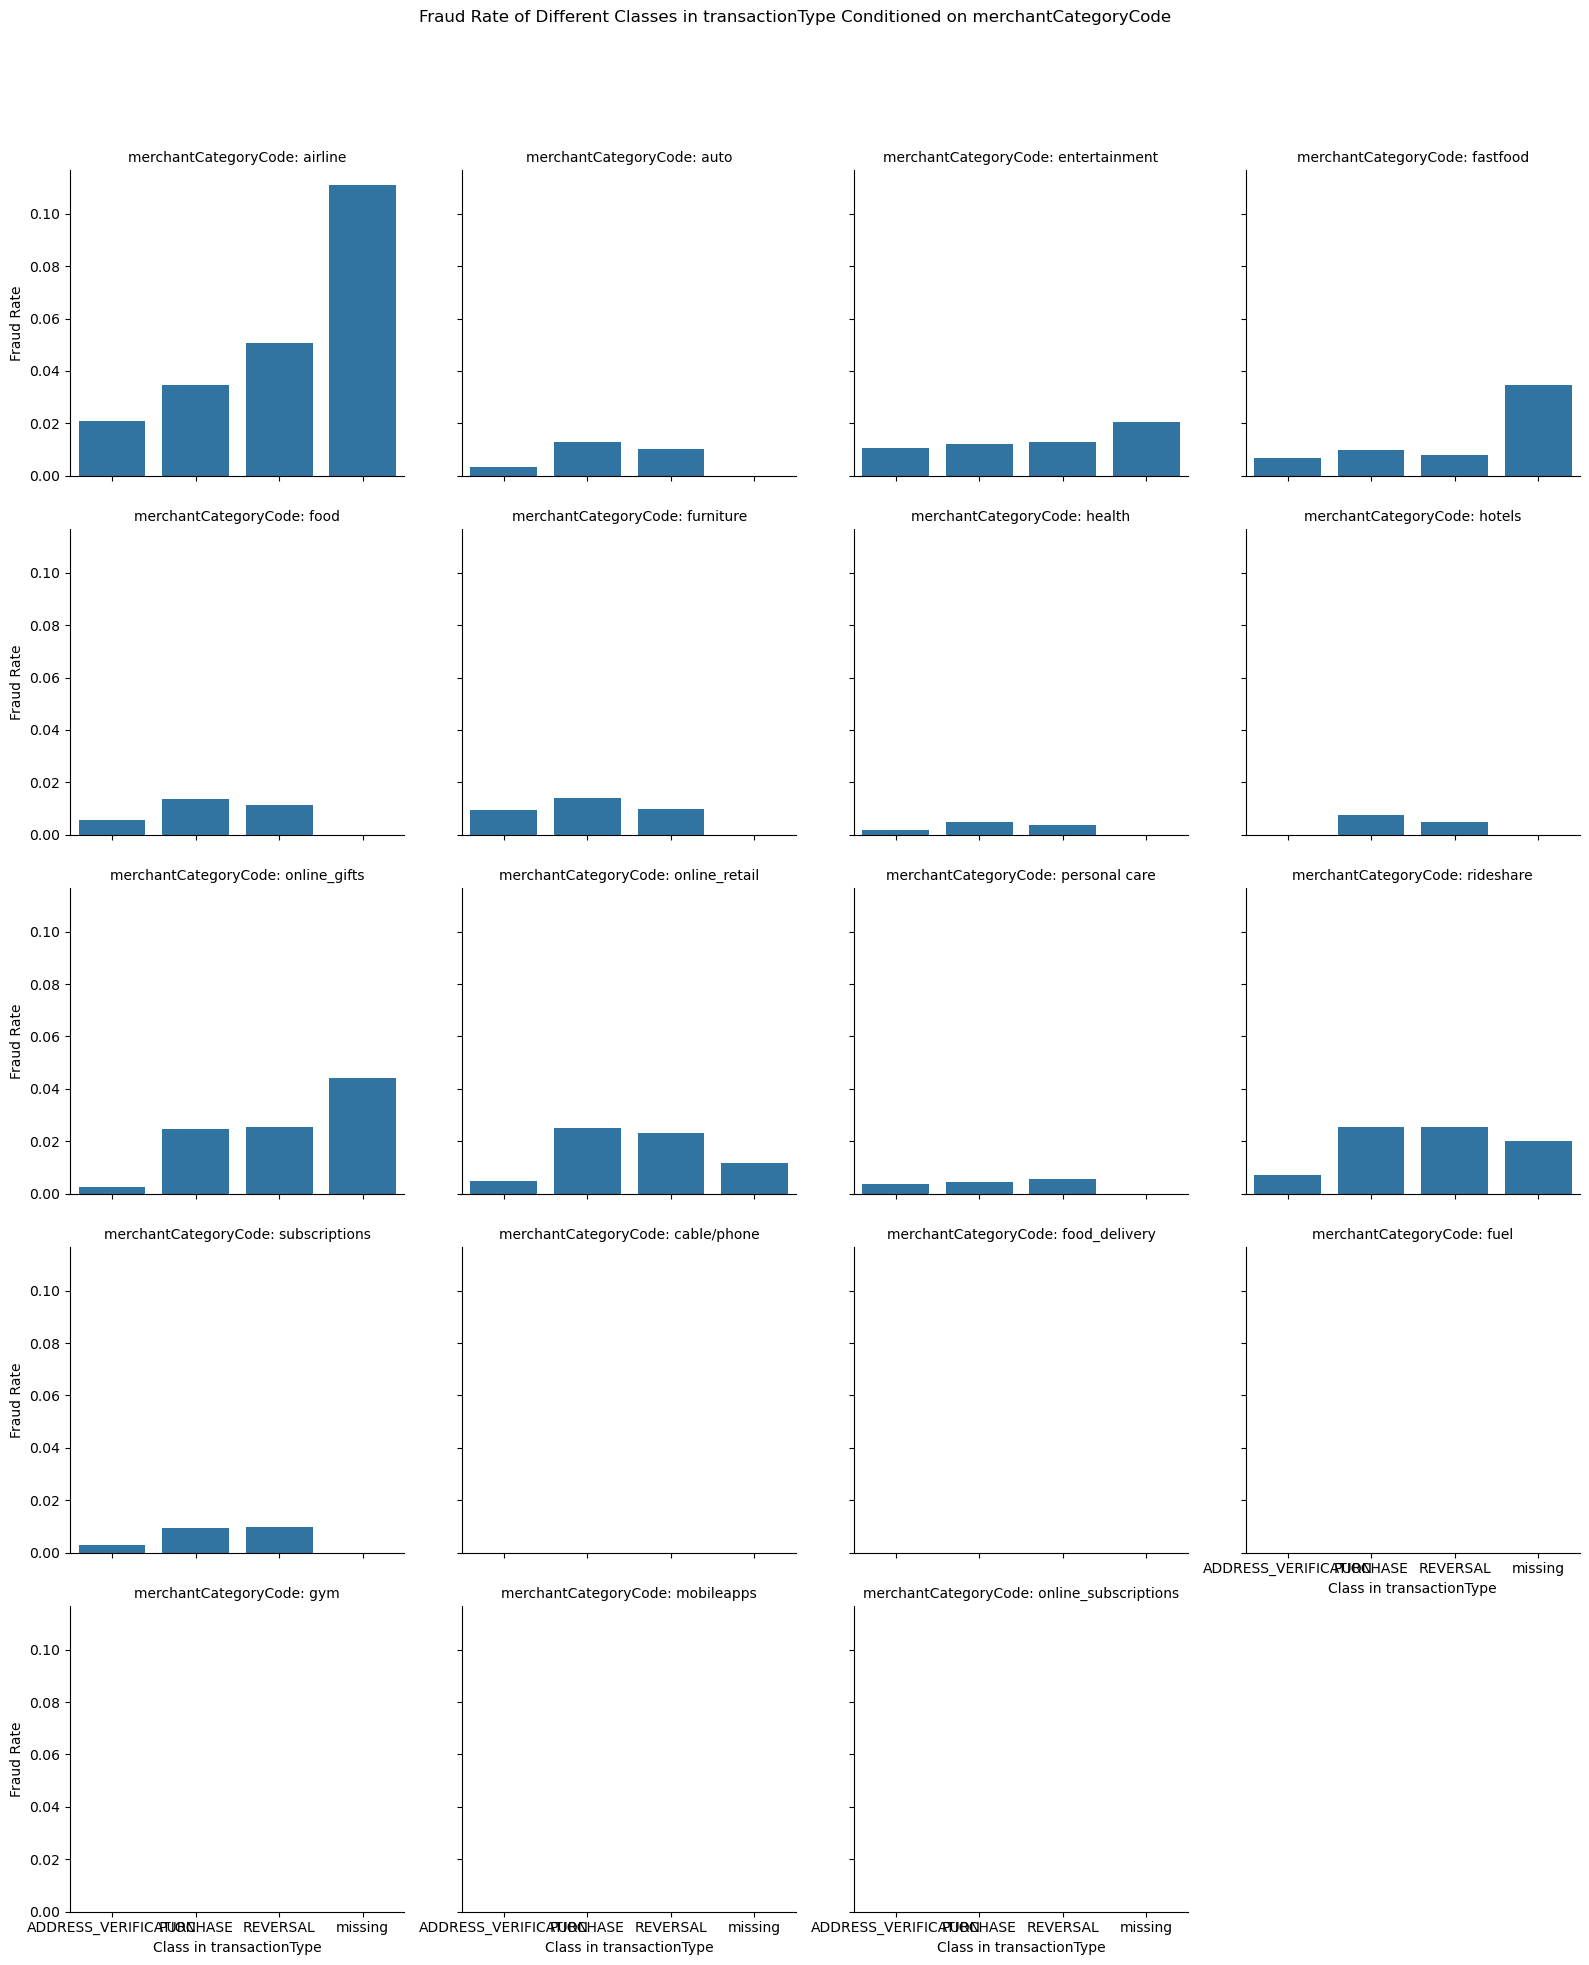

In [124]:
g = sns.FacetGrid(fraud_rate, col='merchantCategoryCode', col_wrap=4, sharex=True, sharey=True, height=4)
g.map(sns.barplot, 'transactionType', 'fraud_rate', order=fraud_rate['transactionType'].unique())

g.set_axis_labels('Class in transactionType', 'Fraud Rate')
g.set_titles('merchantCategoryCode: {col_name}')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Fraud Rate of Different Classes in transactionType Conditioned on merchantCategoryCode')

plt.show()

/var/folders/67/kpl0tnjd1md6qddgggbqjqyr0000gn/T/ipykernel_96385/3638853895.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  fraud_rate_pivot = fraud_rate.pivot("transactionType", "merchantCategoryCode", "fraud_rate")


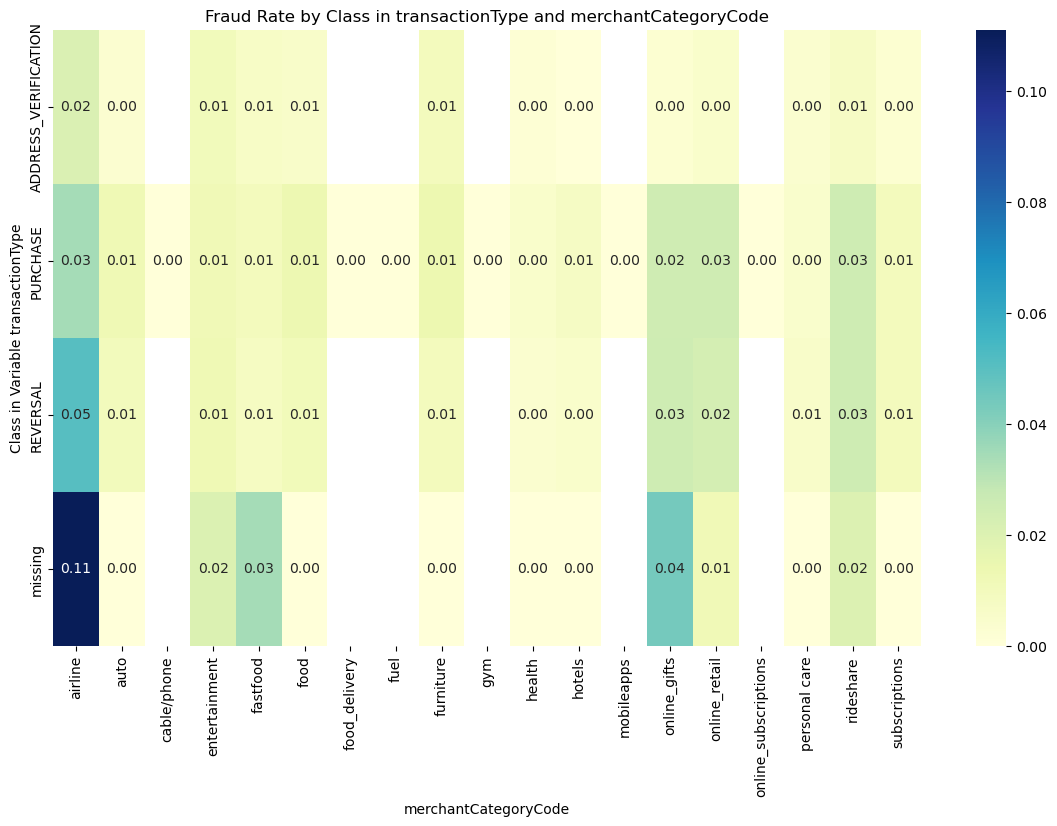

In [125]:
fraud_rate_pivot = fraud_rate.pivot("transactionType", "merchantCategoryCode", "fraud_rate")

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(fraud_rate_pivot, annot=True, fmt=".2f", cmap="YlGnBu")

plt.title('Fraud Rate by Class in transactionType and merchantCategoryCode')
plt.xlabel('merchantCategoryCode')
plt.ylabel('Class in Variable transactionType')
plt.savefig('Image/heatmap fraud condition.jpg', bbox_inches='tight')

plt.show()

# 10. The relationships between numerical variables and the target variable

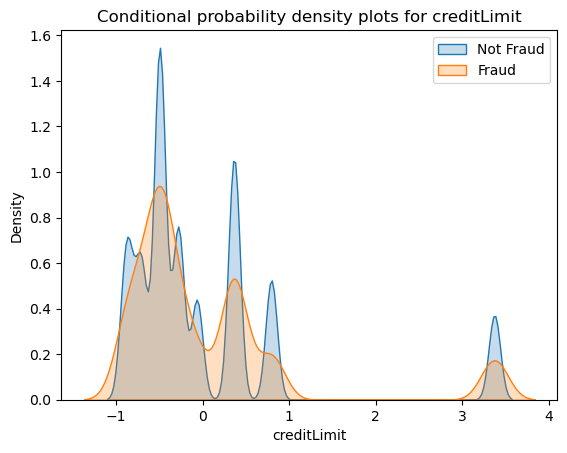

In [126]:
sns.kdeplot(data=df_revised[df_revised['isFraud'] == 0], x='creditLimit', label='Not Fraud', fill=True)
sns.kdeplot(data=df_revised[df_revised['isFraud'] == 1], x='creditLimit', label='Fraud', fill=True)
plt.title('Conditional probability density plots for creditLimit')
plt.legend()
plt.savefig('Image/10 density creditLimit.jpg', bbox_inches='tight')
plt.show()

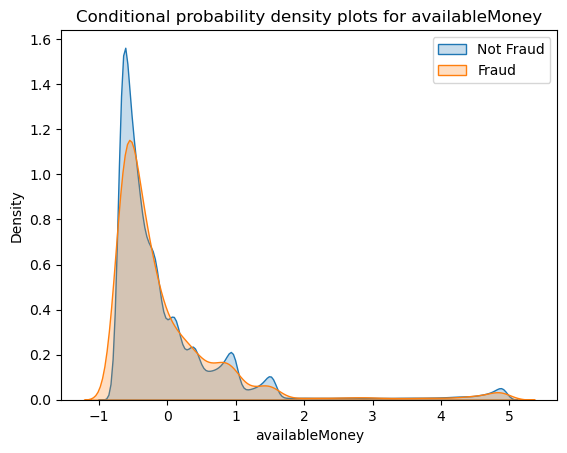

In [127]:
sns.kdeplot(data=df_revised[df_revised['isFraud'] == 0], x='availableMoney', label='Not Fraud', fill=True)
sns.kdeplot(data=df_revised[df_revised['isFraud'] == 1], x='availableMoney', label='Fraud', fill=True)
plt.title('Conditional probability density plots for availableMoney')
plt.legend()
plt.savefig('Image/10 density availableMoney.jpg', bbox_inches='tight')
plt.show()

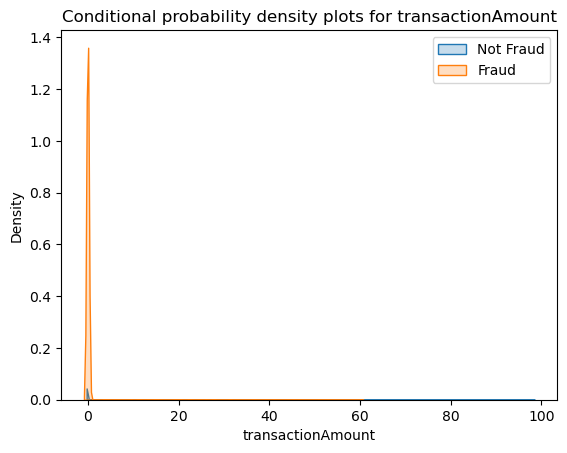

In [128]:
sns.kdeplot(data=df_revised[df_revised['isFraud'] == 0], x='transactionAmount', label='Not Fraud', fill=True)
sns.kdeplot(data=df_revised[df_revised['isFraud'] == 1], x='transactionAmount', label='Fraud', fill=True)
plt.title('Conditional probability density plots for transactionAmount')
plt.legend()
plt.savefig('Image/10 density transactionAmount.jpg', bbox_inches='tight')
plt.show()

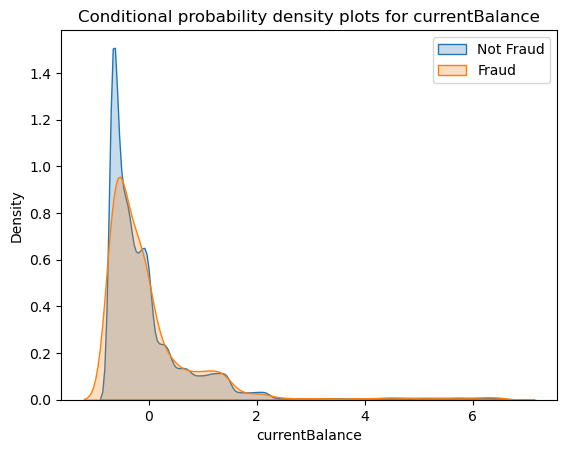

In [67]:
sns.kdeplot(data=df_revised[df_revised['isFraud'] == 0], x='currentBalance', label='Not Fraud', fill=True)
sns.kdeplot(data=df_revised[df_revised['isFraud'] == 1], x='currentBalance', label='Fraud', fill=True)
plt.title('Conditional probability density plots for currentBalance')
plt.legend()
plt.savefig('Image/10 density currentBalance.jpg', bbox_inches='tight')
plt.show()

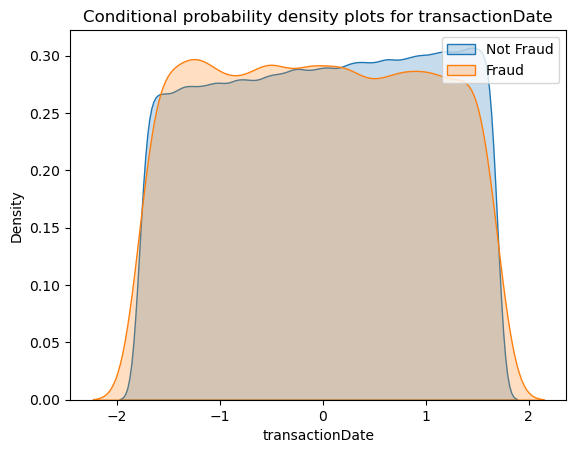

In [68]:
sns.kdeplot(data=df_revised[df_revised['isFraud'] == 0], x='transactionDate', label='Not Fraud', fill=True)
sns.kdeplot(data=df_revised[df_revised['isFraud'] == 1], x='transactionDate', label='Fraud', fill=True)
plt.title('Conditional probability density plots for transactionDate')
plt.legend()
plt.savefig('Image/10 density transactionDate.jpg', bbox_inches='tight')
plt.show()

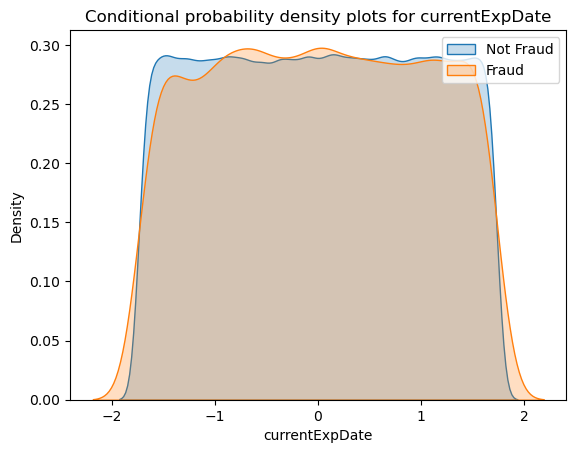

In [69]:
sns.kdeplot(data=df_revised[df_revised['isFraud'] == 0], x='currentExpDate', label='Not Fraud', fill=True)
sns.kdeplot(data=df_revised[df_revised['isFraud'] == 1], x='currentExpDate', label='Fraud', fill=True)
plt.title('Conditional probability density plots for currentExpDate')
plt.legend()
plt.savefig('Image/10 density currentExpDate.jpg', bbox_inches='tight')
plt.show()

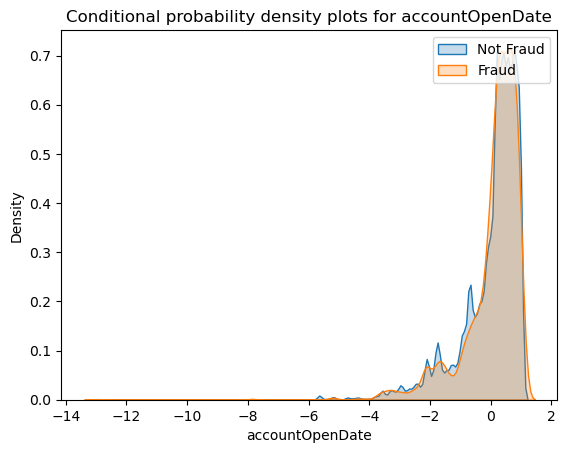

In [70]:
sns.kdeplot(data=df_revised[df_revised['isFraud'] == 0], x='accountOpenDate', label='Not Fraud', fill=True)
sns.kdeplot(data=df_revised[df_revised['isFraud'] == 1], x='accountOpenDate', label='Fraud', fill=True)
plt.title('Conditional probability density plots for accountOpenDate')
plt.legend()
plt.savefig('Image/10 density accountOpenDate.jpg', bbox_inches='tight')
plt.show()

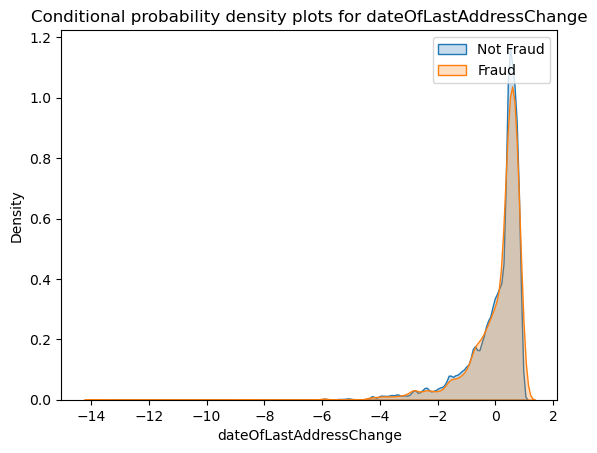

In [71]:
sns.kdeplot(data=df_revised[df_revised['isFraud'] == 0], x='dateOfLastAddressChange', label='Not Fraud', fill=True)
sns.kdeplot(data=df_revised[df_revised['isFraud'] == 1], x='dateOfLastAddressChange', label='Fraud', fill=True)
plt.title('Conditional probability density plots for dateOfLastAddressChange')
plt.legend()
plt.savefig('Image/10 density dateOfLastAddressChange.jpg', bbox_inches='tight')
plt.show()

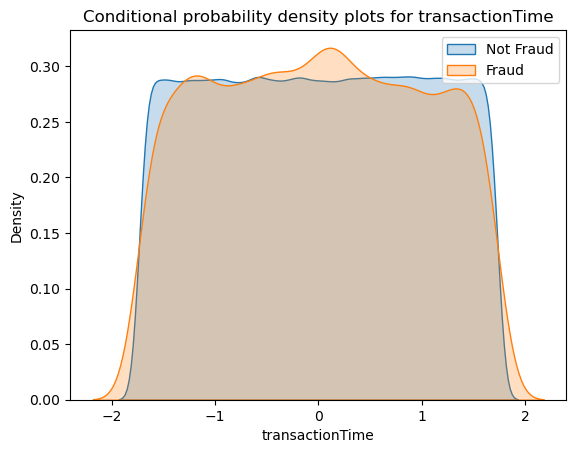

In [72]:
sns.kdeplot(data=df_revised[df_revised['isFraud'] == 0], x='transactionTime', label='Not Fraud', fill=True)
sns.kdeplot(data=df_revised[df_revised['isFraud'] == 1], x='transactionTime', label='Fraud', fill=True)
plt.title('Conditional probability density plots for transactionTime')
plt.legend()
plt.savefig('Image/10 density transactionTime.jpg', bbox_inches='tight')
plt.show()

# 11. Identify multi-swipe transactions

In [73]:
df_revised.head()

,accountNumber,creditLimit,availableMoney,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,...,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,transactionAmount_origin,transactionDateTime_origin,transactionDate,transactionTime,enter_right,freq_last_4Digits
0,737265056,-0.494962,-0.140835,-0.041205,Uber,US,US,2.0,1.0,rideshare,...,-0.698224,False,False,False,98.55,2016-08-13 14:27:32,0.365422,0.353285,True,1
1,737265056,-0.494962,-0.140835,-0.043344,AMC #191138,US,US,9.0,1.0,entertainment,...,-0.698224,True,False,False,74.51,2016-10-11 05:05:54,0.926615,-0.997933,True,14
2,737265056,-0.494962,-0.140835,-0.049307,Play Store,US,US,9.0,1.0,mobileapps,...,-0.698224,False,False,False,7.47,2016-11-08 09:18:39,1.192945,-0.389849,True,14
3,737265056,-0.494962,-0.140835,-0.049307,Play Store,US,US,9.0,1.0,mobileapps,...,-0.698224,False,False,False,7.47,2016-12-10 02:14:50,1.497321,-1.409498,True,14
4,830329091,-0.494962,-0.140835,-0.043640,Tim Hortons #947751,US,US,2.0,1.0,fastfood,...,-0.698224,True,False,False,71.18,2016-03-24 21:04:46,-0.985249,1.308978,True,30


In [74]:
df_temp = df_revised.sort_values(by=['accountNumber', 'transactionDateTime_origin'])
df_temp['time_diff'] = df_temp.groupby(['accountNumber', 'transactionAmount_origin'])['transactionDateTime_origin'].diff()
df_temp.head()

,accountNumber,creditLimit,availableMoney,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,...,cardPresent,expirationDateKeyInMatch,isFraud,transactionAmount_origin,transactionDateTime_origin,transactionDate,transactionTime,enter_right,freq_last_4Digits,time_diff
541900,100088067,3.37229,4.926288,-0.031724,EZ Putt Putt #982199,US,US,2.0,1.0,entertainment,...,True,False,False,205.13,2016-01-12 00:59:52,-1.670095,-1.589858,True,47,NaT
541901,100088067,3.37229,4.903190,-0.045842,Dinosaur Sandwitch Bar #303701,US,US,5.0,1.0,food,...,True,False,False,46.43,2016-01-12 19:49:41,-1.670095,1.128337,True,47,NaT
541902,100088067,3.37229,4.897962,-0.016286,Mobile eCards,US,US,5.0,1.0,online_gifts,...,False,False,False,378.67,2016-01-17 15:41:46,-1.622537,0.531881,True,28,NaT
541903,100088067,3.37229,4.926288,-0.044094,EZ Putt Putt #40513,US,US,2.0,1.0,entertainment,...,True,False,False,66.07,2016-02-02 19:57:18,-1.470348,1.146662,True,47,NaT
541904,100088067,3.37229,4.918849,-0.037375,34th BBQ #412895,US,US,9.0,8.0,food,...,True,False,False,141.60,2016-02-03 04:48:54,-1.460837,-1.038833,True,47,NaT


In [75]:
df_temp['is_multi_swipe'] = df_temp['time_diff'] <= pd.Timedelta(minutes=15)
# Filter out the first transaction in each sequence by marking them as not multi-swipe
df_temp.loc[df_temp.groupby(['accountNumber', 'transactionAmount_origin', 'is_multi_swipe'])['transactionDateTime_origin'].idxmin(), 'is_multi_swipe'] = False

In [76]:
total_transactions = len(df_temp)
multi_swipe_transactions = df_temp['is_multi_swipe'].sum()
multi_swipe_percentage = (multi_swipe_transactions / total_transactions) * 100

total_amount = df_temp['transactionAmount_origin'].sum()
multi_swipe_amount = df_temp.loc[df_temp['is_multi_swipe'], 'transactionAmount_origin'].sum()
multi_swipe_amount_percentage = (multi_swipe_amount / total_amount) * 100

print(f"Percentage of Multi-Swipe Transactions: {multi_swipe_percentage}%")
print(f"Percentage of Total Dollar Amount in Multi-Swipe Transactions: {multi_swipe_amount_percentage}%")

Percentage of Multi-Swipe Transactions: 0.1204278431207979%
Percentage of Total Dollar Amount in Multi-Swipe Transactions: 0.09138930771917252%


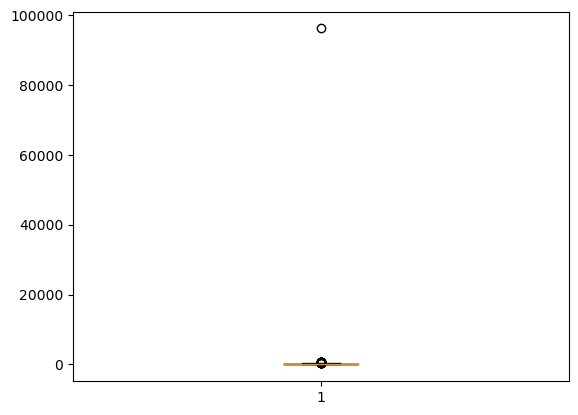

In [77]:
df_temp_average = df_temp[df_temp['is_multi_swipe']].groupby('accountNumber')['transactionAmount_origin'].mean().reset_index(name='average_amount')
plt.boxplot(df_temp_average['average_amount'])
plt.show()

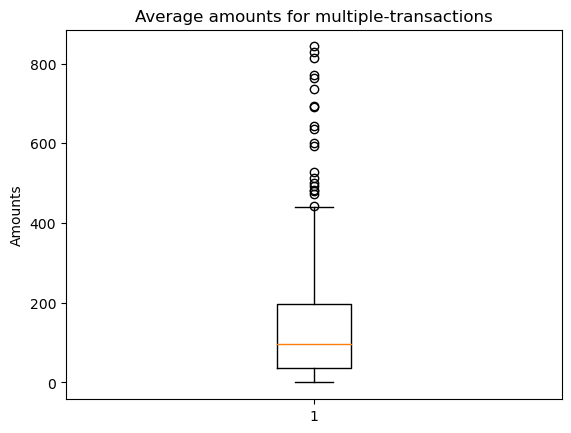

In [78]:
plt.boxplot(df_temp_average[df_temp_average['average_amount'] < 10000]['average_amount'])
plt.title('Average amounts for multiple-transactions')
plt.ylabel('Amounts')
plt.savefig('Image/11 boxplot.jpg', bbox_inches='tight')
plt.show()

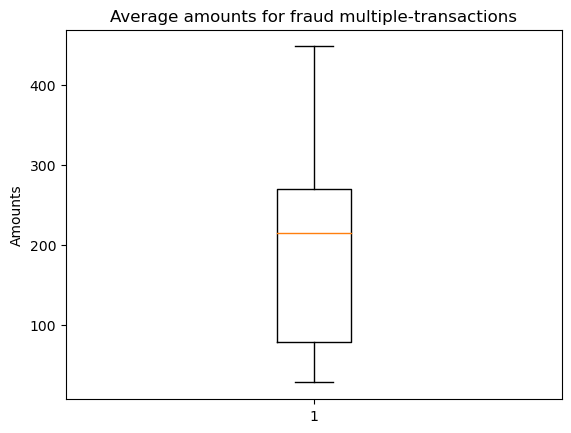

In [79]:
df_temp_average = df_temp[df_temp['is_multi_swipe']].groupby(['accountNumber', 'isFraud'])['transactionAmount_origin'].mean().reset_index(name='average_amount')
plt.boxplot(df_temp_average[df_temp_average['isFraud']]['average_amount'])
plt.title('Average amounts for fraud multiple-transactions')
plt.ylabel('Amounts')
plt.savefig('Image/11 fraud boxplot.jpg', bbox_inches='tight')
plt.show()

In [80]:
df_temp_average

,accountNumber,isFraud,average_amount
0,100737756,False,693.50
1,101380713,False,33.74
2,101876201,False,202.75
3,102980467,False,333.92
4,107124479,False,45.98
...,...,...,...
508,987594719,False,15.12
509,988393082,False,1.74
510,992532997,False,191.52
511,993237077,False,37.53


In [81]:
sum(df_temp[df_temp['is_multi_swipe'] == True]['isFraud']) / sum(df_temp['is_multi_swipe'] == True)

0.012671594508975714

# 12. The class imbalance

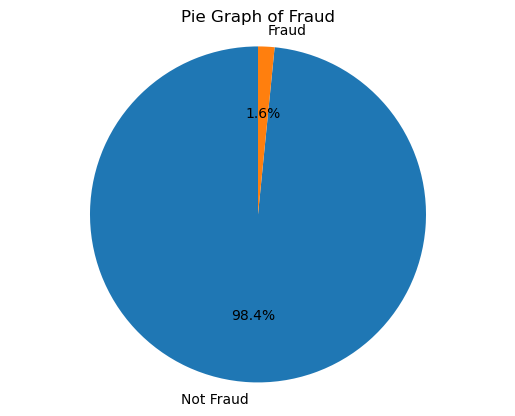

In [82]:
fraud_distribution = df_temp['isFraud'].value_counts()

# Define labels for the pie chart
labels = 'Not Fraud', 'Fraud'

# Define colors for each section
colors = ['#1f77b4', '#ff7f0e']

# Plot a pie chart
fig, ax = plt.subplots()
ax.pie(fraud_distribution, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

# Add a title
plt.title('Pie Graph of Fraud')
plt.savefig('Image/12 Pie graph.jpg', bbox_inches='tight')
# Display the pie chart
plt.show()

# 13. Mitigate class imbalance

In [83]:
df_revised.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 786363 entries, 0 to 786362
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   accountNumber               786363 non-null  int64         
 1   creditLimit                 786363 non-null  float64       
 2   availableMoney              786363 non-null  float64       
 3   transactionAmount           786363 non-null  float64       
 4   merchantName                786363 non-null  object        
 5   acqCountry                  786363 non-null  object        
 6   merchantCountryCode         786363 non-null  object        
 7   posEntryMode                786363 non-null  object        
 8   posConditionCode            786363 non-null  object        
 9   merchantCategoryCode        786363 non-null  object        
 10  currentExpDate              786363 non-null  float64       
 11  accountOpenDate             786363 non-

In [85]:
df_majority = df_revised[df_revised.isFraud==0]
df_minority = df_revised[df_revised.isFraud==1]

# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                   replace=False,    # sample without replacemen
                                   n_samples=len(df_minority),  # to match minority class
                                   random_state=123) # reproducible results

# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

# Display new class counts
print(df_downsampled.isFraud.value_counts())

False    12417
True     12417
Name: isFraud, dtype: int64


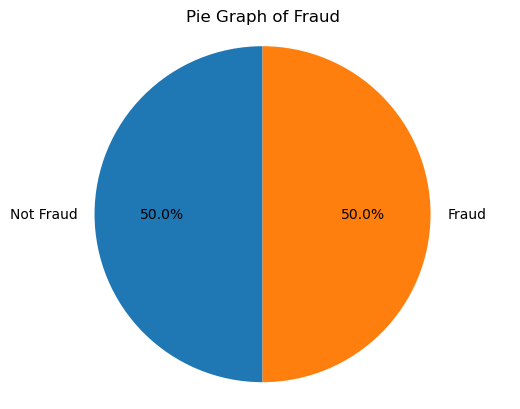

In [88]:
fraud_distribution = df_downsampled['isFraud'].value_counts()

# Define labels for the pie chart
labels = 'Not Fraud', 'Fraud'

# Define colors for each section
colors = ['#1f77b4', '#ff7f0e']

# Plot a pie chart
fig, ax = plt.subplots()
ax.pie(fraud_distribution, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

# Add a title
plt.title('Pie Graph of Fraud')
plt.savefig('Image/13 Pie graph.jpg', bbox_inches='tight')
# Display the pie chart
plt.show()